# Let's find a data set:

### 60000 online dating profiles

### [Published](http://ww2.amstat.org/publications/jse/v23n2/kim.pdf) in the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/), Volume 23, Number 2 (2015) by Albert Y. Kim et al.

### CFAA: Explicitly allowed by OkCupid co-founder and CEO [Christian Rudder](http://blog.okcupid.com/)

### Ethically and legally acceptable

### [Wired article about ethical issues](https://www.wired.com/2016/05/okcupid-study-reveals-perils-big-data-science/))

## Go to https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles_revised.csv.zip
## Click on the download button on the right side of the page
## upload that file into jupyter notebooks

In [32]:
!unzip profiles_revised.csv.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [4]:
#import data

df = pd.read_csv("profiles_revised.csv")

In [5]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  offspring    24385 non-null  object 
 11  orientation  59946 non-null  object 
 12  pets         40025 non-null  object 
 13  religion     39720 non-null  object 
 14  sex          59946 non-null  object 
 15  sign         48890 non-null  object 
 16  smokes       54434 non-null  object 
 17  speaks       59896 non-null  object 
 18  status       59946 non-null  object 
dtypes: f

In [7]:
df.describe()

#why are income percentiles = -1??

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.335402,68.295281,20033.222534
std,9.490009,3.994803,97346.192104
min,17.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,111.000000,95.000000,1000000.000000


In [8]:
#check for missing data

df.isnull().sum()

#people don't want to share about diet, kids, pets, or religion!

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

# Removing numerical outliers

### Age

In [9]:
df2 = df.copy()

In [10]:
#check for outliers in numerical data

# 1. age

# creating new column with z-scores
df2["zscoreage"] = np.abs(stats.zscore(df2["age"]))

# identifying outliers with z-scores > 3
outlierAge = df2.loc[df2["zscoreage"]>3].index

print(outlierAge)

# many outliers in age category - let's see what the ages are

Int64Index([  172,   233,   257,   320,   323,   328,   335,   348,   349,
              555,
            ...
            59186, 59283, 59303, 59326, 59428, 59501, 59534, 59601, 59740,
            59837],
           dtype='int64', length=981)


In [11]:
df2.loc[df2["zscoreage"]>3]

#outliers appear to be over 60 years old

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,zscoreage
172,62,fit,anything,socially,never,graduated from masters program,white,73.0,-1,executive / management,has kids,straight,likes dogs,christianity,m,NaN,no,english,single,3.125903
233,66,fit,mostly anything,socially,never,graduated from college/university,white,65.0,40000,retired,NaN,straight,likes dogs and likes cats,christianity and laughing about it,f,pisces and it&rsquo;s fun to think about,no,"english, french, spanish (poorly)",single,3.547402
257,62,thin,NaN,socially,never,masters program,white,67.0,-1,sales / marketing / biz dev,has kids,straight,NaN,NaN,f,NaN,NaN,english,single,3.125903
320,62,a little extra,NaN,socially,sometimes,graduated from masters program,white,67.0,-1,education / academia,doesn&rsquo;t want kids,gay,has cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single,3.125903
323,61,thin,anything,socially,never,graduated from college/university,white,64.0,-1,artistic / musical / writer,doesn&rsquo;t have kids,straight,has dogs,other,f,NaN,no,english,single,3.020528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59501,62,curvy,anything,socially,never,graduated from masters program,white,64.0,-1,banking / financial / real estate,doesn&rsquo;t have kids,straight,NaN,other,f,capricorn,no,english,single,3.125903
59534,61,athletic,mostly anything,socially,never,graduated from masters program,white,71.0,250000,science / tech / engineering,has kids,straight,likes dogs and likes cats,NaN,m,aries but it doesn&rsquo;t matter,no,english,single,3.020528
59601,70,athletic,mostly vegetarian,not at all,sometimes,graduated from two-year college,white,63.0,-1,medicine / health,has a kid,straight,has dogs,other and laughing about it,f,gemini but it doesn&rsquo;t matter,no,english (fluently),single,3.968902
59740,61,athletic,anything,often,never,graduated from masters program,white,73.0,-1,artistic / musical / writer,has kids,straight,has cats,agnosticism and laughing about it,f,cancer but it doesn&rsquo;t matter,trying to quit,"english (fluently), spanish (fluently)",single,3.020528


In [12]:
df2 = df2.drop(outlierAge)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58965 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          58965 non-null  int64  
 1   body_type    53712 non-null  object 
 2   diet         34982 non-null  object 
 3   drinks       56011 non-null  object 
 4   drugs        44981 non-null  object 
 5   education    52434 non-null  object 
 6   ethnicity    53345 non-null  object 
 7   height       58962 non-null  float64
 8   income       58965 non-null  int64  
 9   job          50859 non-null  object 
 10  offspring    23698 non-null  object 
 11  orientation  58965 non-null  object 
 12  pets         39344 non-null  object 
 13  religion     38921 non-null  object 
 14  sex          58965 non-null  object 
 15  sign         48103 non-null  object 
 16  smokes       53487 non-null  object 
 17  speaks       58916 non-null  object 
 18  status       58965 non-null  object 
 19  zsco

In [13]:
(df2["age"]<18).value_counts()

# 94 people listed under age 18 - REMOVE

False    58871
True        94
Name: age, dtype: int64

In [14]:
under_age = df2.loc[df2["age"]<18].index

In [15]:
df2 = df2.drop(under_age)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58871 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          58871 non-null  int64  
 1   body_type    53624 non-null  object 
 2   diet         34924 non-null  object 
 3   drinks       55928 non-null  object 
 4   drugs        44896 non-null  object 
 5   education    52359 non-null  object 
 6   ethnicity    53261 non-null  object 
 7   height       58868 non-null  float64
 8   income       58871 non-null  int64  
 9   job          50786 non-null  object 
 10  offspring    23644 non-null  object 
 11  orientation  58871 non-null  object 
 12  pets         39282 non-null  object 
 13  religion     38862 non-null  object 
 14  sex          58871 non-null  object 
 15  sign         48023 non-null  object 
 16  smokes       53404 non-null  object 
 17  speaks       58822 non-null  object 
 18  status       58871 non-null  object 
 19  zsco

In [16]:
#check to make sure under 18 removed

(df2["age"]>=18).value_counts()

True    58871
Name: age, dtype: int64

### Height 

In [17]:
#check for outliers in numerical data

# 2. height

# creating new column with z-scores
df2["zscorehgt"] = np.abs(stats.zscore(df2["height"]))

# identifying outliers with z-scores > 3
outlierHgt = df2.loc[df2["zscorehgt"]>3].index

print(outlierHgt)

# no height outliers!

Int64Index([], dtype='int64')


### Income 

In [18]:
#check for outliers in numerical data

# 3. income

# creating new column with z-scores
df2["zscoreinc"] = np.abs(stats.zscore(df2["income"]))

# identifying outliers with z-scores > 3
outlierInc = df2.loc[df2["zscoreinc"]>3].index

print(outlierInc)

# many income outliers!

Int64Index([   48,   102,   107,   123,   216,   301,   697,   831,   937,
              942,
            ...
            58834, 58908, 58927, 58981, 59099, 59280, 59429, 59551, 59818,
            59855],
           dtype='int64', length=567)


In [19]:
df2 = df2.drop(outlierInc)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,pets,religion,sex,sign,smokes,speaks,status,zscoreage,zscorehgt,zscoreinc
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1.089092,NaN,0.205508
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0.386157,NaN,0.611102
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,0.491531,NaN,0.205508
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,1.089092,NaN,0.001348
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,likes dogs and likes cats,NaN,m,aquarius,no,english,single,0.246093,NaN,0.205508


In [20]:
#find number of rows with income = -1

fakeInc = df2.loc[df2["income"]==-1].index
print(fakeInc)

#income column appears to be a joke - drop it

Int64Index([    0,     2,     4,     5,     6,     7,     8,     9,    10,
               12,
            ...
            59935, 59936, 59937, 59938, 59939, 59940, 59941, 59942, 59944,
            59945],
           dtype='int64', length=47576)


In [21]:
df2.loc[(df2["income"]==-1) & (df["body_type"] == "athletic")]

# income = -1 is non-response

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,pets,religion,sex,sign,smokes,speaks,status,zscoreage,zscorehgt,zscoreinc
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,likes dogs and likes cats,NaN,m,aquarius,no,english,single,0.246093,NaN,0.205508
9,37,athletic,mostly anything,not at all,never,working on two-year college,white,65.0,-1,student,...,likes dogs and likes cats,atheism and laughing about it,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single,0.491531,NaN,0.205508
19,34,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,-1,science / tech / engineering,...,likes dogs and likes cats,catholicism but not too serious about it,m,pisces and it&rsquo;s fun to think about,no,english (fluently),single,0.175407,NaN,0.205508
21,23,athletic,NaN,socially,never,working on college/university,NaN,67.0,-1,student,...,likes dogs and likes cats,catholicism and somewhat serious about it,f,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",single,0.983717,NaN,0.205508
31,28,athletic,anything,socially,never,graduated from college/university,NaN,72.0,-1,science / tech / engineering,...,likes dogs,atheism,m,NaN,no,english,single,0.456842,NaN,0.205508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59868,31,athletic,NaN,socially,NaN,graduated from college/university,black,70.0,-1,other,...,NaN,NaN,m,aries,yes,"english (fluently), spanish",single,0.140718,NaN,0.205508
59880,24,athletic,mostly anything,socially,never,working on med school,white,69.0,-1,student,...,likes cats,NaN,m,scorpio but it doesn&rsquo;t matter,no,english (fluently),single,0.878342,NaN,0.205508
59919,41,athletic,NaN,NaN,NaN,graduated from college/university,white,66.0,-1,sales / marketing / biz dev,...,likes dogs and likes cats,christianity and laughing about it,f,capricorn and it&rsquo;s fun to think about,NaN,"english (fluently), spanish (poorly)",single,0.913031,NaN,0.205508
59926,27,athletic,mostly anything,socially,never,working on masters program,white,64.0,-1,NaN,...,likes dogs,christianity but not too serious about it,f,NaN,no,english,single,0.562217,NaN,0.205508


In [22]:
df2.isnull().sum()

age                0
body_type       5216
diet           23790
drinks          2916
drugs          13840
education       6478
ethnicity       5542
height             3
income             0
job             8041
offspring      34888
orientation        0
pets           19466
religion       19881
sex                0
sign           10754
smokes          5409
speaks            49
status             0
zscoreage          0
zscorehgt      58304
zscoreinc          0
dtype: int64

# Removing Columns with Too Much Missing Data
- Income
- Offspring

In [23]:
df2.drop(columns = ["zscoreage", "zscorehgt", "zscoreinc"], inplace = True)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58304 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          58304 non-null  int64  
 1   body_type    53088 non-null  object 
 2   diet         34514 non-null  object 
 3   drinks       55388 non-null  object 
 4   drugs        44464 non-null  object 
 5   education    51826 non-null  object 
 6   ethnicity    52762 non-null  object 
 7   height       58301 non-null  float64
 8   income       58304 non-null  int64  
 9   job          50263 non-null  object 
 10  offspring    23416 non-null  object 
 11  orientation  58304 non-null  object 
 12  pets         38838 non-null  object 
 13  religion     38423 non-null  object 
 14  sex          58304 non-null  object 
 15  sign         47550 non-null  object 
 16  smokes       52895 non-null  object 
 17  speaks       58255 non-null  object 
 18  status       58304 non-null  object 
dtypes: f

# Feature Engineering

In [25]:
df2["drinks"].value_counts()

socially       40807
rarely          5732
often           5028
not at all      3085
very often       443
desperately      293
Name: drinks, dtype: int64

In [26]:
def drink_level(drink):
    if drink == "desperately":
        return 6
    if drink == "very often":
        return 5
    if drink == "often":
        return 4
    if drink == "socially":
        return 3
    if drink == "rarely":
        return 2
    if drink == "not at all":
        return 1

df2["drink_level"] = df2["drinks"].apply(drink_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0


In [27]:
df2["drugs"].value_counts()

never        36619
sometimes     7476
often          369
Name: drugs, dtype: int64

In [28]:
def drugs_level(drug):
    if drug == "often":
        return 3
    if drug == "sometimes":
        return 2
    if drug == "never":
        return 1

df2["drugs_level"] = df2["drugs"].apply(drugs_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0


In [29]:
df2["education"].value_counts()

graduated from college/university    23466
graduated from masters program        8646
working on college/university         5598
working on masters program            1666
graduated from two-year college       1479
graduated from high school            1375
graduated from ph.d program           1196
graduated from law school             1079
working on two-year college           1055
working on ph.d program                972
dropped out of college/university      946
college/university                     773
graduated from space camp              605
dropped out of space camp              485
graduated from med school              430
working on space camp                  418
working on law school                  267
working on med school                  209
two-year college                       205
dropped out of two-year college        178
dropped out of masters program         133
masters program                        129
dropped out of ph.d program            119
dropped out

In [117]:
# create 3 groups for Education Type

def edu_groups(type):
    if type == ("dropped out of high school" or "working on high school" or "high school"):
        return "HS or Less"
    if type == ("working on college/university" or "graduated from college/university" or "college/university" or "two-year college" or "graduated from two-year college" or "dropped out of college/university"):
        return "2-4-Year College"
    if type == ("graduated from masters program" or "working on masters program" or"graduated from ph.d program" or "graduated from law school" or "working on ph.d program" or "graduated from space camp" or "dropped out of space camp" or "graduated from med school" or "working on space camp" or "working on law school" or "working on med school" or "dropped out of masters program" or "masters program" or "dropped out of ph.d program" or "space camp" or "ph.d program" or "law school" or "dropped out of law school" or "dropped out of med school" or "med school"):
        return "More than College"

df2["Edu_Type"] = df2["education"].apply(edu_groups)

df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group,income_group,income_level,height_level,height_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,Unknown,0.0,5.0,6' - 6'5
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,None,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,$80K-$149K,3.0,4.0,5'6 - 5'11
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,More than College,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,4.0,5'6 - 5'11
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,$20K-$49K,1.0,4.0,5'6 - 5'11
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,None,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,4.0,5'6 - 5'11


In [118]:
def edu_level(type):
    if type == "HS or Less":
        return 1
    if type == "2-4-Year College":
        return 2
    if type == "More than College":
        return 3

df2["Edu_Level"] = df2["Edu_Type"].apply(edu_level)

df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group,income_group,income_level,height_level,height_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2.0,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,Unknown,0.0,5.0,6' - 6'5
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,None,NaN,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,$80K-$149K,3.0,4.0,5'6 - 5'11
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,More than College,3.0,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,4.0,5'6 - 5'11
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2.0,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,$20K-$49K,1.0,4.0,5'6 - 5'11
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,None,NaN,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,4.0,5'6 - 5'11


In [32]:
df2["offspring"].value_counts()

doesn&rsquo;t have kids                                7427
doesn&rsquo;t have kids, but might want them           3819
doesn&rsquo;t have kids, but wants them                3539
doesn&rsquo;t want kids                                2779
has a kid                                              1723
has kids                                               1608
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1082
has kids, but doesn&rsquo;t want more                   383
has a kid, but doesn&rsquo;t want more                  234
has a kid, and might want more                          228
wants kids                                              220
might want kids                                         177
has kids, and might want more                           111
has a kid, and wants more                                69
has kids, and wants more                                 17
Name: offspring, dtype: int64

In [33]:
def kids_level(ans):
    if ans == "has kids, and wants more":
        return 15
    if ans == "has a kid, and wants more":
        return 14
    if ans == "wants kids":
        return 13
    if ans == "doesn&rsquo;t have kids, but wants them":
        return 12
    if ans == "has kids, and might want more":
        return 11
    if ans == "has a kid, and might want more":
        return 10
    if ans == "has kids":
        return 9
    if ans == "has a kid":
        return 8
    if ans == "might want kids":
        return 7
    if ans == "doesn&rsquo;t have kids, but might want them":
        return 6
    if ans == "has kids, but doesn&rsquo;t want more":
        return 5
    if ans == "has a kid, but doesn&rsquo;t want more":
        return 4
    if ans == "doesn&rsquo;t have kids":
        return 3
    if ans == "doesn&rsquo;t want kids":
        return 2
    if ans == "doesn&rsquo;t have kids, and doesn&rsquo;t want any":
        return 1

df2["kids_level"] = df2["offspring"].apply(kids_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,m,aquarius,no,english,single,3.0,1.0,Higher than College/University,3,NaN


In [273]:
def pet_level(ans):
    if ans == "dislikes dogs and dislikes cats":
        return 1
    if ans == "dislikes dogs":
        return 1
    if ans == "dislikes cats":
        return 1
    if ans == "dislikes dogs and has cats":
        return 3
    if ans == "dislikes dogs and likes cats":
        return 2
    if ans == "likes dogs and has cats":
        return 5
    if ans == "likes dogs":
        return 4
    if ans == "likes cats":
        return 4
    if ans == "likes dogs and likes cats":
        return 3
    if ans == "has dogs and likes cats":
        return 5
    if ans == "has dogs and has cats":
        return 5
    if ans == "has dogs":
        return 5
    if ans =="likes dogs and dislikes cats":
        return 2
    if ans == "has dogs and dislikes cats":
        return 3

df2["pet_level"] = df2["pets"].apply(pet_level)

In [34]:
df2["pets"].value_counts()

likes dogs and likes cats          14374
likes dogs                          7081
likes dogs and has cats             4164
has dogs                            4004
has dogs and likes cats             2257
likes dogs and dislikes cats        1989
has dogs and has cats               1404
has cats                            1345
likes cats                          1035
has dogs and dislikes cats           536
dislikes dogs and likes cats         228
dislikes dogs and dislikes cats      183
dislikes cats                        117
dislikes dogs and has cats            77
dislikes dogs                         44
Name: pets, dtype: int64

In [35]:
def dog_level(ans):
    if ans == "dislikes dogs and dislikes cats":
        return 1
    if ans == "dislikes dogs":
        return 2
    if ans == "dislikes dogs and has cats":
        return 3
    if ans == "dislikes dogs and likes cats":
        return 4
    if ans == "likes dogs and has cats":
        return 5
    if ans == "likes dogs":
        return 6
    if ans == "likes dogs and likes cats":
        return 7
    if ans == "has dogs and likes cats":
        return 8
    if ans == "has dogs and has cats":
        return 9
    if ans == "has dogs":
        return 10
    if ans =="likes dogs and dislikes cats":
        return 11
    if ans == "has dogs and dislikes cats":
        return 12

df2["dog_level"] = df2["pets"].apply(dog_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,aquarius,no,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0


In [36]:
df2["pets"].value_counts()

likes dogs and likes cats          14374
likes dogs                          7081
likes dogs and has cats             4164
has dogs                            4004
has dogs and likes cats             2257
likes dogs and dislikes cats        1989
has dogs and has cats               1404
has cats                            1345
likes cats                          1035
has dogs and dislikes cats           536
dislikes dogs and likes cats         228
dislikes dogs and dislikes cats      183
dislikes cats                        117
dislikes dogs and has cats            77
dislikes dogs                         44
Name: pets, dtype: int64

In [37]:
def cat_level(ans):
    if ans == "dislikes dogs and dislikes cats":
        return 1
    if ans == "dislikes cats":
        return 2
    if ans == "has dogs and dislikes cats":
        return 3
    if ans == "likes dogs and dislikes cats":
        return 4
    if ans == "has dogs and likes cats":
        return 5
    if ans == "likes cats":
        return 6
    if ans == "likes dogs and likes cats":
        return 7
    if ans == "likes dogs and has cats":
        return 8
    if ans == "has dogs and has cats":
        return 9
    if ans == "has cats":
        return 10
    if ans =="dislikes dogs and likes cats":
        return 11
    if ans == "dislikes dogs and has cats":
        return 12

df2["cat_level"] = df2["pets"].apply(cat_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,no,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0


In [38]:
df2["smokes"].value_counts()

no                42624
sometimes          3676
when drinking      2988
yes                2169
trying to quit     1438
Name: smokes, dtype: int64

In [39]:
def smoke_level(ans):
    if ans == "no":
        return 1
    if ans == "when drinking":
        return 2
    if ans == "sometimes":
        return 3
    if ans == "trying to quit":
        return 4
    if ans == "yes":
        return 5

df2["smoke_level"] = df2["smokes"].apply(smoke_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0


In [40]:
df2["status"].value_counts()

single            54161
seeing someone     2027
available          1807
married             299
unknown              10
Name: status, dtype: int64

In [41]:
def status_level(ans):
    if ans == "unknown":
        return 1
    if ans == "married":
        return 2
    if ans == "seeing someone":
        return 3
    if ans == "available":
        return 4
    if ans == "single":
        return 5

df2["status_level"] = df2["status"].apply(status_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58304 entries, 0 to 59945
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           58304 non-null  int64  
 1   body_type     53088 non-null  object 
 2   diet          34514 non-null  object 
 3   drinks        55388 non-null  object 
 4   drugs         44464 non-null  object 
 5   education     51826 non-null  object 
 6   ethnicity     52762 non-null  object 
 7   height        58301 non-null  float64
 8   income        58304 non-null  int64  
 9   job           50263 non-null  object 
 10  offspring     23416 non-null  object 
 11  orientation   58304 non-null  object 
 12  pets          38838 non-null  object 
 13  religion      38423 non-null  object 
 14  sex           58304 non-null  object 
 15  sign          47550 non-null  object 
 16  smokes        52895 non-null  object 
 17  speaks        58255 non-null  object 
 18  status        58304 non-nu

# Identifying and Grouping Types of Entries in Categorical Columns

In [43]:
df2["body_type"].value_counts()

average           14215
fit               12361
athletic          11573
thin               4574
curvy              3819
a little extra     2505
skinny             1745
full figured        969
overweight          430
jacked              385
used up             319
rather not say      193
Name: body_type, dtype: int64

In [44]:
# create 5 groups for body type

def body_groups(type):
    if type == ("thin" or "skinny"):
        return "Thin"
    if type == "average":
        return "Average"
    if type == ("a little extra" or "curvy" or "full figured" or "overweight"):
        return "Heavy"
    if type == ("athletic" or "jacked" or "fit"):
        return "Athletic"
    if type == ("rather not say" or "used up"):
        return "Other"

df["Body_Type"] = df["body_type"].apply(body_groups)

df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,Body_Type
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Heavy
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,Average
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Thin
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Thin
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Athletic


Text(0.5, 1.0, 'Count of Body Types - Smaller Groupings')

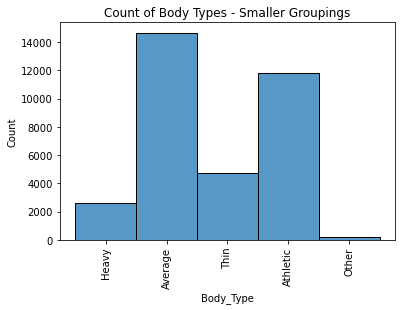

In [45]:
## histogram for Body Type

sns.histplot(x = df["Body_Type"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Body Types - Smaller Groupings")

In [46]:
df2["diet"].value_counts()

mostly anything        16168
anything                6020
strictly anything       4981
mostly vegetarian       3295
mostly other             953
strictly vegetarian      852
vegetarian               657
strictly other           421
mostly vegan             322
other                    317
strictly vegan           222
vegan                    132
mostly kosher             79
mostly halal              45
strictly halal            16
strictly kosher           13
kosher                    11
halal                     10
Name: diet, dtype: int64

In [47]:
# create 4 groups for Diet Type

def diet_groups(type):
    if type == ("vegetarian" or "mostly vegetarian" or "strictly vegan" or "strictly vegetarian" or "mostly vegan" or "vegan"):
        return "Veg/Vegan"
    if type == ("strictly anything" or "anything" or "mostly anything"):
        return "Omnivore"
    if type == ("mostly halal" or "mostly kosher" or "halal" or "strictly halal" or "kosher" or "strictly kosher"):
        return "Religion-based"
    if type == ("mostly other" or "strictly other" or "other"):
        return "Other"

df2["Diet_Type"] = df2["diet"].apply(diet_groups)

df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None


Text(0.5, 1.0, 'Count of Diet Types by Grouping')

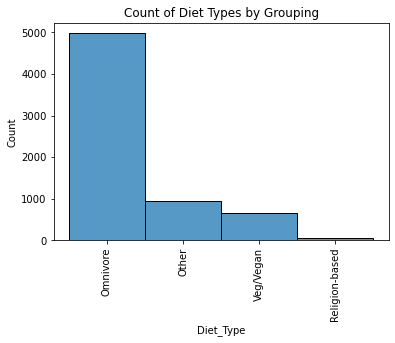

In [48]:
## histogram for diet

sns.histplot(x = df2["Diet_Type"], kde = False)
plt.xticks(rotation = 90)
plt.title('Count of Diet Types by Grouping')

Text(0.5, 1.0, 'Count of Drink Type')

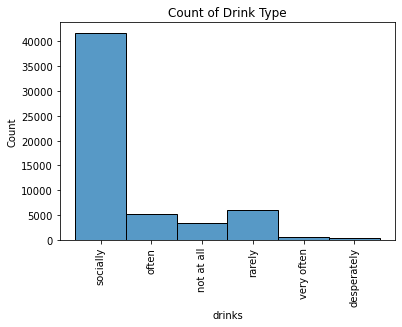

In [49]:
## histogram for drinks

sns.histplot(x = df["drinks"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drink Type")

Text(0.5, 1.0, 'Count of Drink Levels')

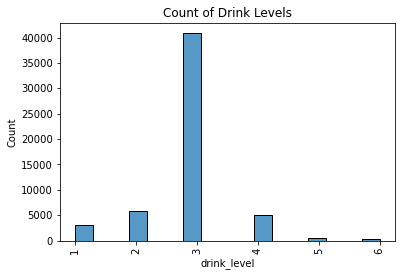

In [50]:
## histogram for drink_level

sns.histplot(x = df2["drink_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drink Levels")

Text(0.5, 1.0, 'Count of Drugs Type')

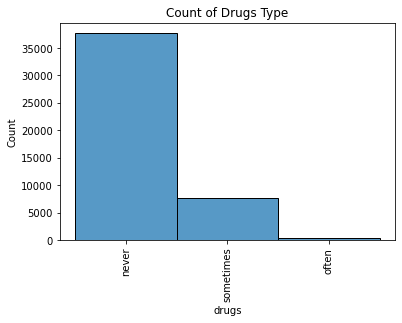

In [51]:
## histogram for drugs

sns.histplot(x = df["drugs"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drugs Type")

Text(0.5, 1.0, 'Count of Drugs Levels')

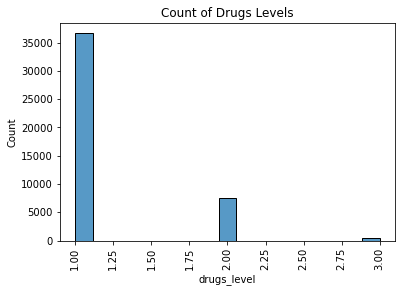

In [52]:
## histogram for drugs_level

sns.histplot(x = df2["drugs_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drugs Levels")

Text(0.5, 1.0, 'Count of Education Level')

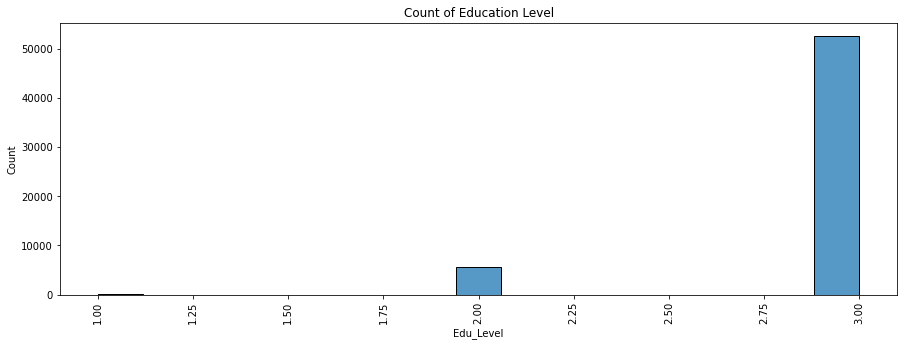

In [53]:
## histogram for education level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["Edu_Level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Education Level")

Text(0.5, 1.0, 'Count of Education Type')

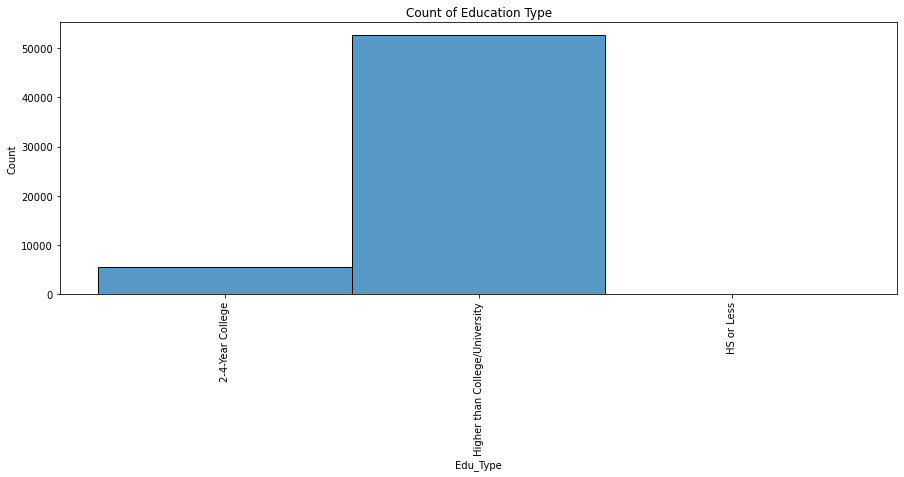

In [54]:
## histogram for education type

plt.figure(figsize = (15,5))
sns.histplot(x = df2["Edu_Type"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Education Type")

Text(0.5, 1.0, 'Count of Orientation')

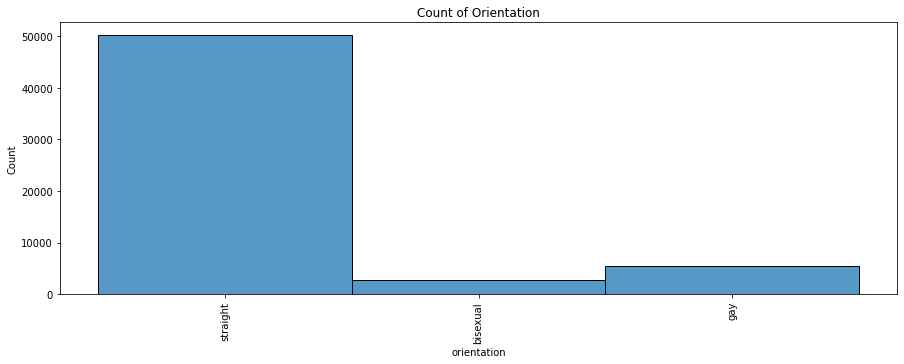

In [55]:
## histogram for sexual orientation

plt.figure(figsize = (15,5))
sns.histplot(x = df2["orientation"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Orientation")

In [56]:
df2["religion"].value_counts()

agnosticism                                   2663
agnosticism but not too serious about it      2579
other                                         2563
agnosticism and laughing about it             2428
catholicism but not too serious about it      2278
atheism                                       2123
other and laughing about it                   2034
atheism and laughing about it                 2018
christianity                                  1915
christianity but not too serious about it     1894
other but not too serious about it            1477
judaism but not too serious about it          1417
atheism but not too serious about it          1298
catholicism                                   1046
christianity and somewhat serious about it     885
atheism and somewhat serious about it          825
other and somewhat serious about it            803
catholicism and laughing about it              712
judaism and laughing about it                  666
buddhism but not too serious ab

In [57]:
def rel_level_2(ans):
    if ans == "hinduism and laughing about it":
        return 1
    if ans == "islam and laughing about it":
        return 1
    if ans == "buddhism and laughing about it":
        return 1
    if ans == "judaism and laughing about it":
        return 1
    if ans == "christianity and laughing about it":
        return 1
    if ans == "catholicism and laughing about it":
        return 1
    if ans == "hinduism but not too serious about it":
        return 2
    if ans == "islam but not too serious about it":
        return 2
    if ans == "buddhism but not too serious about it":
        return 2
    if ans == "judaism but not too serious about it":
        return 2
    if ans == "christianity but not too serious about it":
        return 2
    if ans == "catholicism but not too serious about it":
        return 2
    if ans == "hinduism":
        return 3
    if ans == "islam":
        return 3
    if ans == "buddhism":
        return 3
    if ans == "judaism":
        return 3
    if ans == "christianity":
        return 3
    if ans == "catholicism":
        return 3
    if ans == "hinduism and somewhat serious about it":
        return 4
    if ans == "islam and somewhat serious about it":
        return 4
    if ans == "buddhism and somewhat serious about it":
        return 4
    if ans == "judaism and somewhat serious about it":
        return 4
    if ans == "christianity and somewhat serious about it":
        return 4
    if ans == "catholicism and somewhat serious about it":
        return 4
    if ans == "hinduism and very serious about it":
        return 5 
    if ans == "islam and very serious about it":
        return 5 
    if ans == "buddhism and very serious about it":
        return 5 
    if ans == "judaism and very serious about it":
        return 5 
    if ans == "christianity and very serious about it":
        return 5 
    if ans == "catholicism and very serious about it":
        return 5 
    
df2["religious_level_no_ath_agn"] = df2["religion"].apply(rel_level_2)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None,NaN


Text(0.5, 1.0, 'Count of Religious Levels (without Atheism or Agnosticism)')

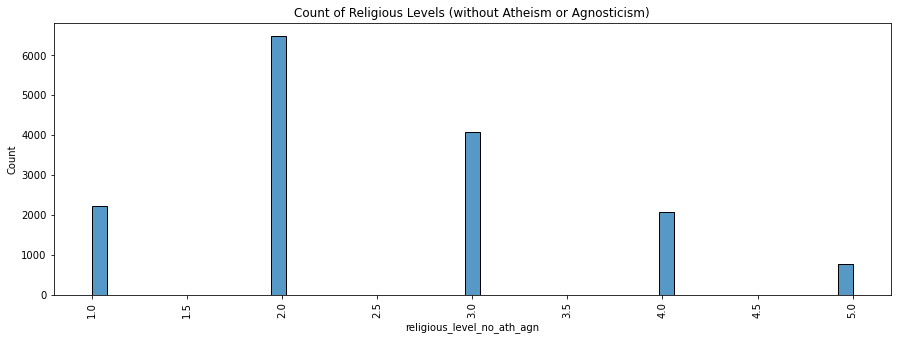

In [99]:
## histogram for religious level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["religious_level_no_ath_agn"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Religious Levels (without Atheism or Agnosticism)")

In [ ]:
# EASIER, FASTER ALTERNATIVE TO CREATING RELIGION STRENGTH AND GROUPS

#def evalReligion(txt):
    #rel = ''
    #relstrength = -1
    #if "christianity" in txt:
        #rel = "Christianity"
    #elif "Judaism" in txt:
        #rel = "Judaism"
    #elif 
    
    #if "and serious about it" in txt:
        #relstrength = 5
    #elif "serious about it" in txt:
        #relstrength = 4
        
    #return rel, relstrength

#religion, religionstrength = evalReligion("christianity and not serious about it")
    

In [103]:
df2.describe()

,age,height,income,drink_level,drugs_level,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,income_level
count,58304.000000,58301.000000,58304.000000,55388.000000,44464.000000,58304.000000,23416.000000,36341.000000,27709.000000,52895.000000,58304.000000,15661.000000,15661.000000,8595.000000,6812.000000,444.000000,137.000000,1860.000000,2944.000000,5607.000000,4669.000000,53144.000000
mean,31.857883,68.298914,11014.551729,2.907760,1.184734,2.900727,5.732448,7.275006,6.890324,1.441062,4.883404,2.531575,2.531575,2.277487,2.498972,2.484234,2.832117,2.439247,2.165421,2.891029,2.363247,0.198179
std,8.621917,3.969843,29519.631561,0.698685,0.408912,0.304431,3.638248,1.825442,1.625125,1.020158,0.453172,1.045566,1.045566,1.058516,1.252042,0.939345,1.128308,1.134366,0.896332,1.065498,0.943331,0.675328
min,18.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26.000000,66.000000,-1.000000,3.000000,1.000000,3.000000,3.000000,6.000000,7.000000,1.000000,5.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,30.000000,68.000000,-1.000000,3.000000,1.000000,3.000000,5.000000,7.000000,7.000000,1.000000,5.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,36.000000,71.000000,-1.000000,3.000000,1.000000,3.000000,8.000000,8.000000,8.000000,1.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,0.000000
max,60.000000,95.000000,250000.000000,6.000000,3.000000,3.000000,15.000000,12.000000,12.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [108]:
def hgt_group(ans):
    if ans < 48:
        return "less than 4'"
    if (ans >= 48 and ans < 60):
        return "4' - 4'11"
    if (ans >= 60 and ans <66):
        return "5' - 5'5"
    if (ans >= 66 and ans <72):
        return "5'6 - 5'11"
    if (ans >= 72 and ans <78):
        return "6' - 6'5"
    if (ans >78):
        return "6'6+"

df2["height_group"] = df2["height"].apply(hgt_group)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group,income_group,income_level,height_level,height_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,Unknown,0.0,6' - 6'5,6' - 6'5
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,$80K-$149K,3.0,5'6 - 5'11,5'6 - 5'11
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,5'6 - 5'11,5'6 - 5'11
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,$20K-$49K,1.0,5'6 - 5'11,5'6 - 5'11
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,5'6 - 5'11,5'6 - 5'11


In [109]:
def hgt_level(ans):
    if ans < 48:
        return 1
    if (ans >= 48 and ans < 60):
        return 2
    if (ans >= 60 and ans <66):
        return 3
    if (ans >= 66 and ans <72):
        return 4
    if (ans >= 72 and ans <78):
        return 5
    if (ans >78):
        return 6

df2["height_level"] = df2["height"].apply(hgt_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group,income_group,income_level,height_level,height_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,Unknown,0.0,5.0,6' - 6'5
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,$80K-$149K,3.0,4.0,5'6 - 5'11
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,4.0,5'6 - 5'11
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,$20K-$49K,1.0,4.0,5'6 - 5'11
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0,4.0,5'6 - 5'11


In [92]:
df2["income"].value_counts()

-1         47576
 20000      2919
 100000     1586
 80000      1081
 30000      1031
 40000       985
 50000       951
 60000       717
 70000       694
 150000      617
 250000      147
Name: income, dtype: int64

In [95]:
def inc_group(ans):
    if ans == -1:
        return "Unknown"
    if ans == (20000 or 30000 or 40000):
        return "$20K-$49K"
    if ans == (50000 or 60000 or 70000):
        return "$50K-$79K"
    if ans == (80000 or 100000):
        return "$80K-$149K"
    if ans == (150000 or 250000):
        return "$150K+"
    
df2["income_group"] = df2["income"].apply(inc_group)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group,income_group,income_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,Unknown,0.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,$80K-$149K,3.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,$20K-$49K,1.0
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,0.0


Text(0.5, 1.0, 'Count of Income Groups')

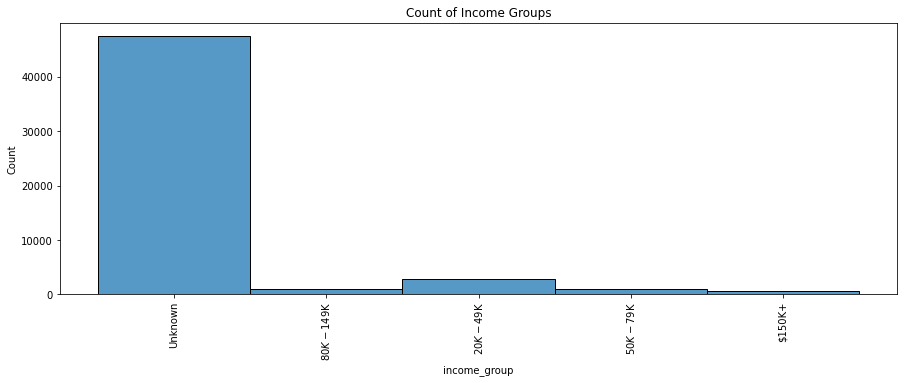

In [100]:
## histogram for income group

plt.figure(figsize = (15,5))
sns.histplot(x = df2["income_group"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Income Groups")

In [139]:
def inc_level(ans):
    if ans == "$20K-$49K":
        return 1
    if ans == "$50K-$79K":
        return 2
    if ans == "$80K-$149K":
        return 3
    if ans == "$150K+":
        return 4    

df2["income_level"] = df2["income_group"].apply(inc_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group,income_group,income_level,height_level,height_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2.0,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,Unknown,NaN,5.0,6' - 6'5
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,None,NaN,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic,$80K-$149K,3.0,4.0,5'6 - 5'11
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,More than College,3.0,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,NaN,4.0,5'6 - 5'11
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2.0,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,$20K-$49K,1.0,4.0,5'6 - 5'11
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,None,NaN,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Unknown,NaN,4.0,5'6 - 5'11


Text(0.5, 1.0, 'Count of Income Levels')

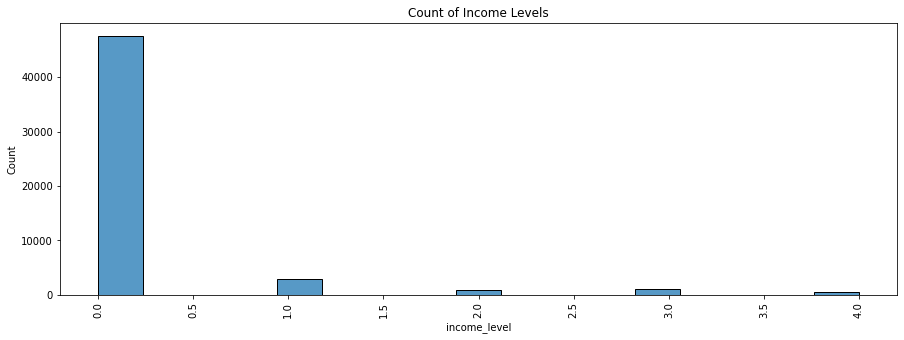

In [102]:
## histogram for income level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["income_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Income Levels")

In [58]:
def rel_level(ans):
    if ans == "agnosticism and laughing about it":
        return 1
    if ans == "agnosticism but not too serious about it":
        return 1
    if ans == "agnosticism":
        return 1
    if ans == "agnosticism and somewhat serious about it":
        return 1
    if ans == "agnosticism and very serious about it":
        return 1
    if ans == "atheism and laughing about it":
        return 1
    if ans == "atheism but not too serious about it":
        return 1
    if ans == "atheism":
        return 1
    if ans == "atheism and somewhat serious about it":
        return 1
    if ans == "atheism and very serious about it":
        return 1
    if ans == "hinduism and laughing about it":
        return 1
    if ans == "islam and laughing about it":
        return 1
    if ans == "buddhism and laughing about it":
        return 1
    if ans == "judaism and laughing about it":
        return 1
    if ans == "christianity and laughing about it":
        return 1
    if ans == "catholicism and laughing about it":
        return 1
    if ans == "hinduism but not too serious about it":
        return 2
    if ans == "islam but not too serious about it":
        return 2
    if ans == "buddhism but not too serious about it":
        return 2
    if ans == "judaism but not too serious about it":
        return 2
    if ans == "christianity but not too serious about it":
        return 2
    if ans == "catholicism but not too serious about it":
        return 2
    if ans == "hinduism":
        return 3
    if ans == "islam":
        return 3
    if ans == "buddhism":
        return 3
    if ans == "judaism":
        return 3
    if ans == "christianity":
        return 3
    if ans == "catholicism":
        return 3
    if ans == "hinduism and somewhat serious about it":
        return 4
    if ans == "islam and somewhat serious about it":
        return 4
    if ans == "buddhism and somewhat serious about it":
        return 4
    if ans == "judaism and somewhat serious about it":
        return 4
    if ans == "christianity and somewhat serious about it":
        return 4
    if ans == "catholicism and somewhat serious about it":
        return 4
    if ans == "hinduism and very serious about it":
        return 5 
    if ans == "islam and very serious about it":
        return 5 
    if ans == "buddhism and very serious about it":
        return 5 
    if ans == "judaism and very serious about it":
        return 5 
    if ans == "christianity and very serious about it":
        return 5 
    if ans == "catholicism and very serious about it":
        return 5 
    
df2["religious_level"] = df2["religion"].apply(rel_level_2)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN


Text(0.5, 1.0, 'Count of Religious Levels')

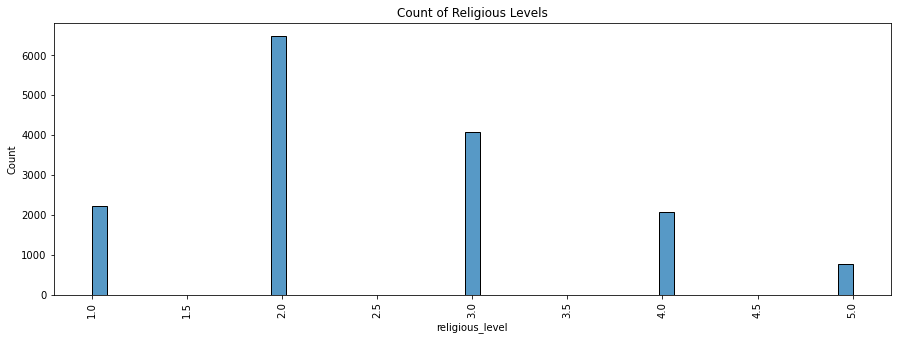

In [98]:
## histogram for religious level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["religious_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Religious Levels")

In [91]:
def rel_group(ans):
    if ans == "judaism and laughing about it":
        return "Jewish"
    if ans == "judaism but not too serious about it":
        return "Jewish"
    if ans == "judaism":
        return "Jewish"
    if ans == "judaism and somewhat serious about it":
        return "Jewish"
    if ans == "judaism and very serious about it":
        return "Jewish" 
    if ans == "catholicism and laughing about it":
        return "Catholic"
    if ans == "catholicism but not too serious about it":
        return "Catholic"
    if ans == "catholicism":
        return "Catholic"
    if ans == "catholicism and somewhat serious about it":
        return "Catholic"
    if ans == "catholicism and very serious about it":
        return "Catholic" 
    if ans == "christianity and laughing about it":
        return "Christian"
    if ans == "christianity but not too serious about it":
        return "Christian"
    if ans == "christianity":
        return "Christian"
    if ans == "christianity and somewhat serious about it":
        return "Christian"
    if ans == "christianity and very serious about it":
        return "Christian"
    if ans == "hinduism and laughing about it":
        return "Hindu"
    if ans == "hinduism but not too serious about it":
        return "Hindu"
    if ans == "hinduism":
        return "Hindu"
    if ans == "hinduism and somewhat serious about it":
        return "Hindu"
    if ans == "hinduism and very serious about it":
        return "Hindu" 
    if ans == "buddhism and laughing about it":
        return "Buddhist"
    if ans == "buddhism but not too serious about it":
        return "Buddhist"
    if ans == "buddhism":
        return "Buddhist"
    if ans == "buddhism and somewhat serious about it":
        return "Buddhist"
    if ans == "buddhism and very serious about it":
        return "Buddhist" 
    if ans == "agnosticism and laughing about it":
        return "Agnostic"
    if ans == "agnosticism but not too serious about it":
        return "Agnostic"
    if ans == "agnosticism":
        return "Agnostic"
    if ans == "agnosticism and somewhat serious about it":
        return "Agnostic"
    if ans == "agnosticism and very serious about it":
        return "Agnostic"
    if ans == "atheism and laughing about it":
        return "Atheist"
    if ans == "atheism but not too serious about it":
        return "Atheist"
    if ans == "atheism":
        return "Atheist"
    if ans == "atheism and somewhat serious about it":
        return "Atheist"
    if ans == "atheism and very serious about it":
        return "Atheist"

df2["religion_group"] = df2["religion"].apply(rel_group)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,drink_level,drugs_level,Edu_Type,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,religion_group
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,3.0,1.0,2-4-Year College,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,4.0,2.0,Higher than College/University,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agnostic
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3.0,NaN,Higher than College/University,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,3.0,NaN,2-4-Year College,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,3.0,1.0,Higher than College/University,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


Text(0.5, 1.0, 'Count of Religious Level (Answered Only)')

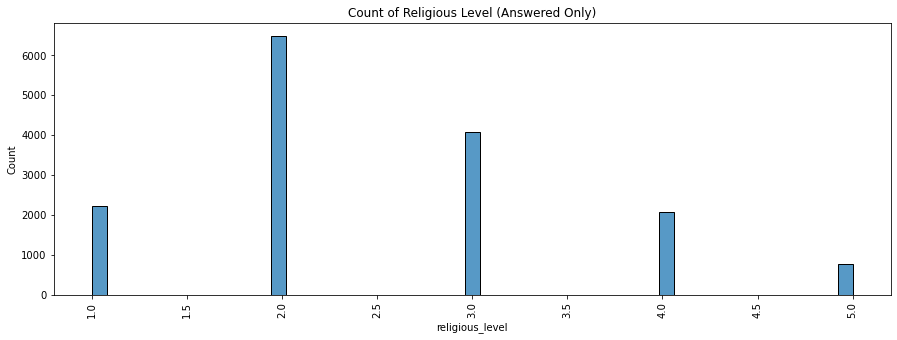

In [59]:
## histogram for religious level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["religious_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Religious Level (Answered Only)")

In [60]:
def agnost_level(ans):
    if ans == "agnosticism and laughing about it":
        return 1
    if ans == "agnosticism but not too serious about it":
        return 2
    if ans == "agnosticism":
        return 3
    if ans == "agnosticism and somewhat serious about it":
        return 4
    if ans == "agnosticism and very serious about it":
        return 5 

df2["agnosticism_level"] = df2["religion"].apply(agnost_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,2,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,3,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,3,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,2,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,3,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Agnosticism Level (Answered Only)')

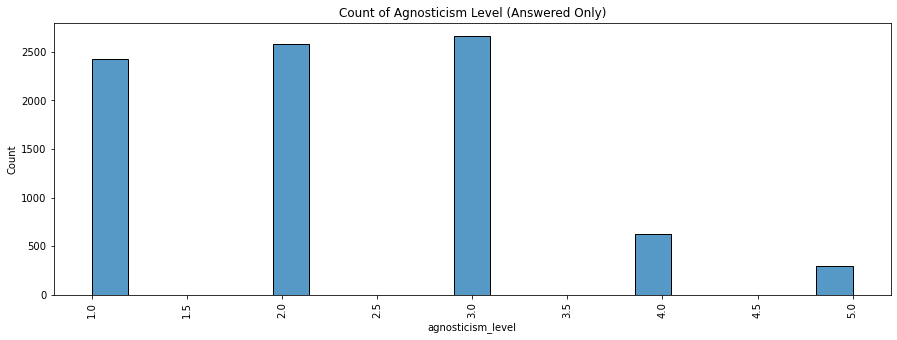

In [61]:
## histogram for agnostic level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["agnosticism_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Agnosticism Level (Answered Only)")

In [62]:
def atheism_level(ans):
    if ans == "atheism and laughing about it":
        return 1
    if ans == "atheism but not too serious about it":
        return 2
    if ans == "atheism":
        return 3
    if ans == "atheism and somewhat serious about it":
        return 4
    if ans == "atheism and very serious about it":
        return 5 
    
df2["atheism_level"] = df2["religion"].apply(atheism_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,kids_level,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,6.0,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,6.0,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,2.0,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,NaN,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Atheism Level (Answered Only)')

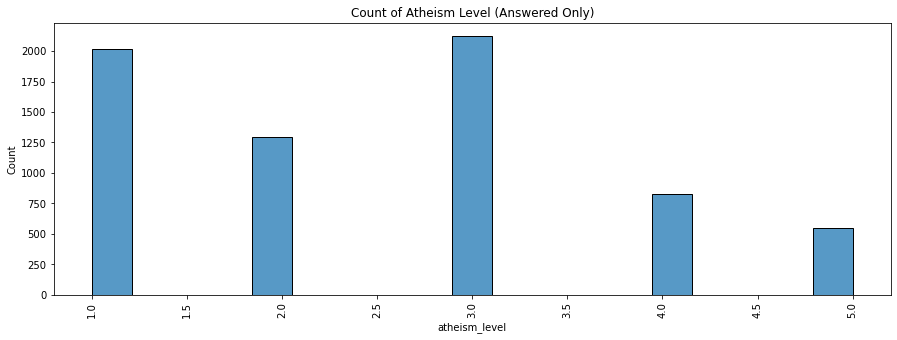

In [63]:
## histogram for atheism level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["atheism_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Atheism Level (Answered Only)")

In [64]:
def hindu_level(ans):
    if ans == "hinduism and laughing about it":
        return 1
    if ans == "hinduism but not too serious about it":
        return 2
    if ans == "hinduism":
        return 3
    if ans == "hinduism and somewhat serious about it":
        return 4
    if ans == "hinduism and very serious about it":
        return 5 

df2["hinduism_level"] = df2["religion"].apply(hindu_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,dog_level,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,7.0,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,7.0,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,NaN,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,7.0,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Hinduism Level (Answered Only)')

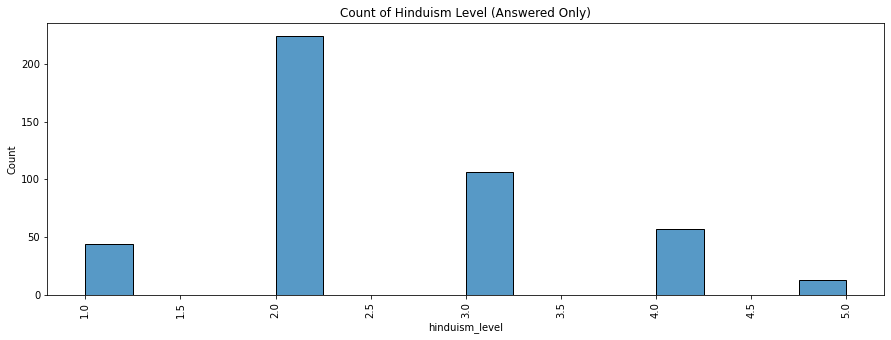

In [65]:
## histogram for hinduism level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["hinduism_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Hinduism Level (Answered Only)")

In [66]:
def islam_level(ans):
    if ans == "islam and laughing about it":
        return 1
    if ans == "islam but not too serious about it":
        return 2
    if ans == "islam":
        return 3
    if ans == "islam and somewhat serious about it":
        return 4
    if ans == "islam and very serious about it":
        return 5 

df2["islam_level"] = df2["religion"].apply(islam_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,cat_level,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,7.0,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,7.0,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,10.0,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,6.0,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,7.0,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Islam Level (Answered Only)')

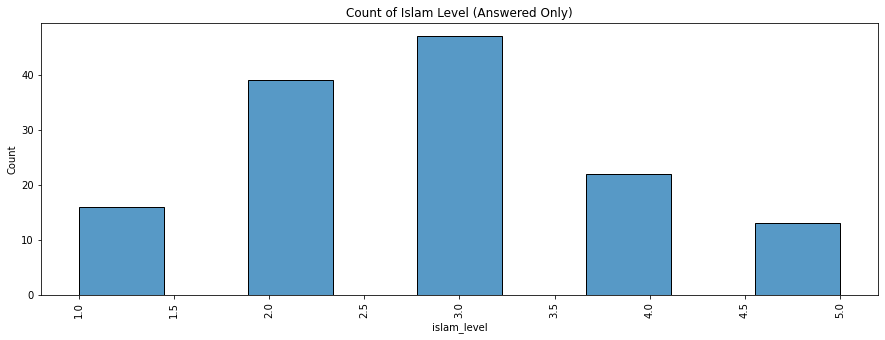

In [67]:
## histogram for Islam level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["islam_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Islam Level (Answered Only)")

In [68]:
def bud_level(ans):
    if ans == "buddhism and laughing about it":
        return 1
    if ans == "buddhism but not too serious about it":
        return 2
    if ans == "buddhism":
        return 3
    if ans == "buddhism and somewhat serious about it":
        return 4
    if ans == "buddhism and very serious about it":
        return 5 

df2["buddhism_level"] = df2["religion"].apply(bud_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,smoke_level,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,3.0,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,1.0,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,1.0,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,1.0,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,1.0,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Buddhism Level (Answered Only)')

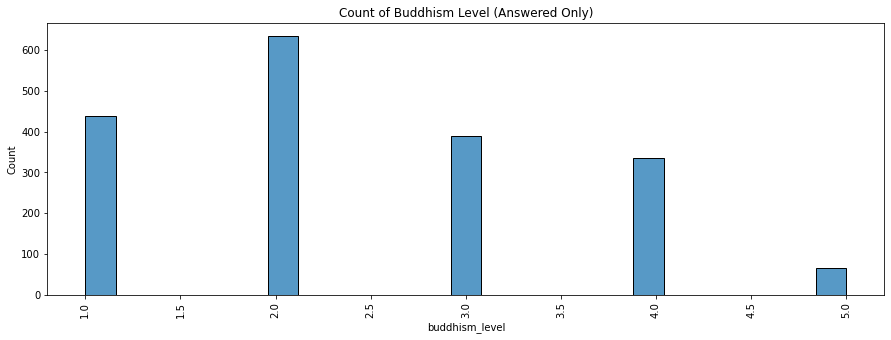

In [69]:
## histogram for buddhism level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["buddhism_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Buddhism Level (Answered Only)")

In [70]:
def jud_level(ans):
    if ans == "judaism and laughing about it":
        return 1
    if ans == "judaism but not too serious about it":
        return 2
    if ans == "judaism":
        return 3
    if ans == "judaism and somewhat serious about it":
        return 4
    if ans == "judaism and very serious about it":
        return 5 

df2["judaism_level"] = df2["religion"].apply(jud_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,status_level,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,5,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,5,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,5,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Judaism Level (Answered Only)')

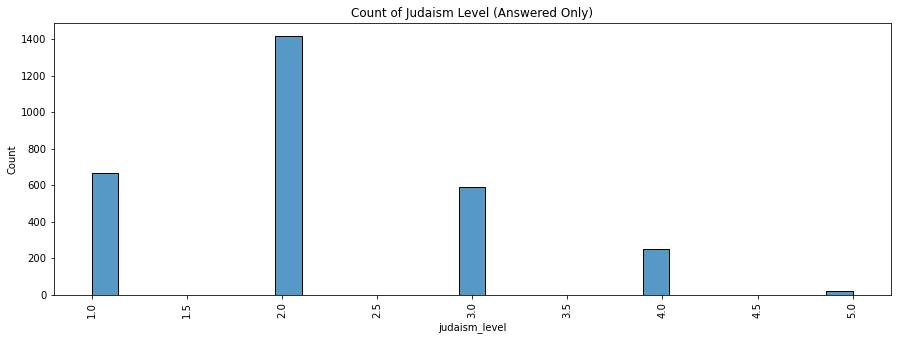

In [71]:
## histogram for judaism level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["judaism_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Judaism Level (Answered Only)")

In [72]:
def christ_level(ans):
    if ans == "christianity and laughing about it":
        return 1
    if ans == "christianity but not too serious about it":
        return 2
    if ans == "christianity":
        return 3
    if ans == "christianity and somewhat serious about it":
        return 4
    if ans == "christianity and very serious about it":
        return 5 

df2["christianity_level"] = df2["religion"].apply(christ_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,Diet_Type,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,Omnivore,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,Other,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,Veg/Vegan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Christianity Level (Answered Only)')

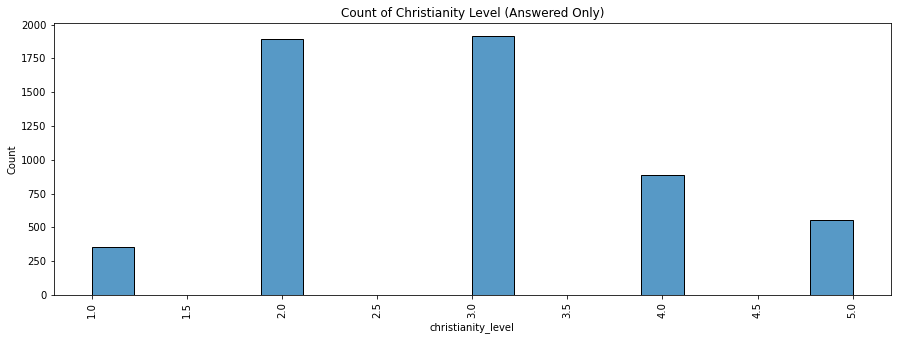

In [73]:
## histogram for christianity level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["christianity_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Christianity Level (Answered Only)")

In [74]:
def cath_level(ans):
    if ans == "catholicism and laughing about it":
        return 1
    if ans == "catholicism but not too serious about it":
        return 2
    if ans == "catholicism":
        return 3
    if ans == "catholicism and somewhat serious about it":
        return 4
    if ans == "catholicism and very serious about it":
        return 5

df2["catholicism_level"] = df2["religion"].apply(cath_level)
df2.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Count of Catholicism Level (Answered Only)')

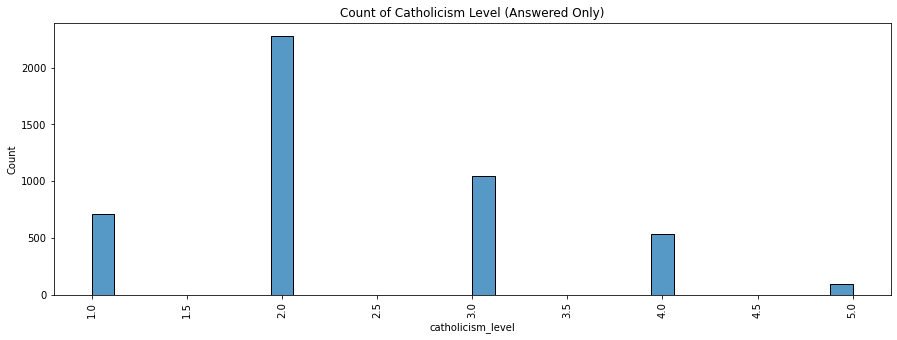

In [75]:
## histogram for catholicism level

plt.figure(figsize = (15,5))
sns.histplot(x = df2["catholicism_level"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Catholicism Level (Answered Only)")

Text(0.5, 1.0, 'Count of Diets')

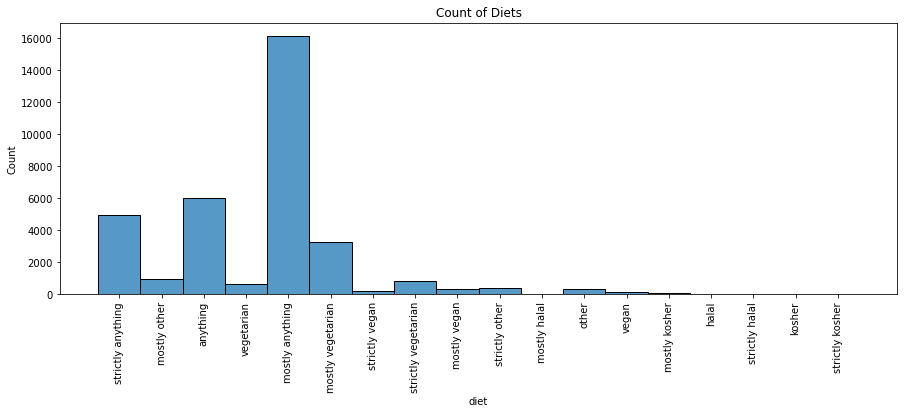

In [76]:
## histogram for diet

plt.figure(figsize = (15,5))
sns.histplot(x = df2["diet"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Diets")

Text(0.5, 1.0, 'Count of Diet Types')

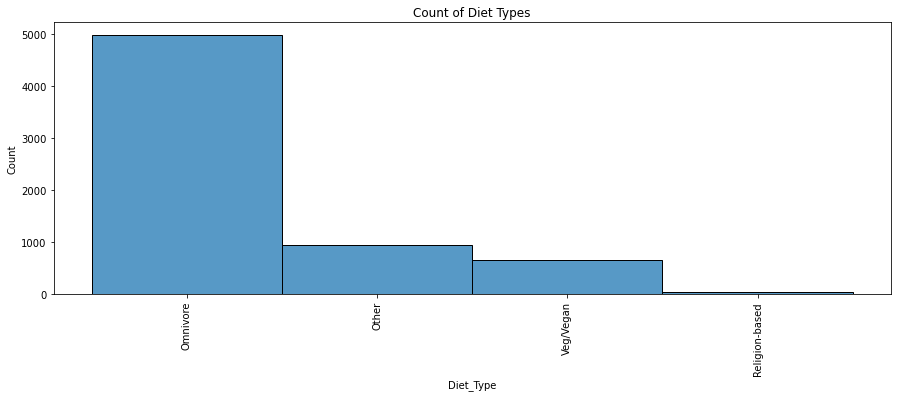

In [77]:
## histogram for diet type

plt.figure(figsize = (15,5))
sns.histplot(x = df2["Diet_Type"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Diet Types")

Text(0.5, 1.0, 'Count of Job Type')

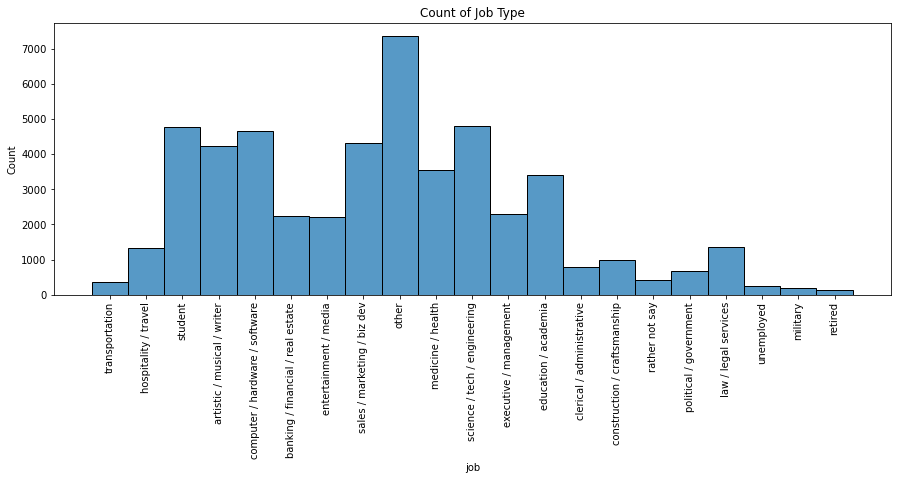

In [78]:
## histogram for job

plt.figure(figsize = (15,5))
sns.histplot(x = df2["job"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Job Type")

Text(0.5, 1.0, 'Distribution of Ages')

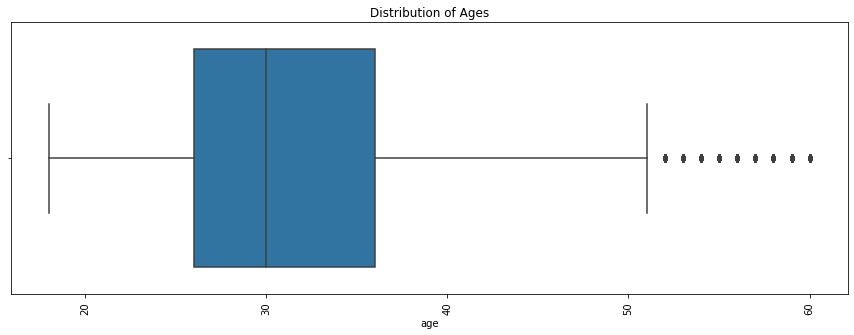

In [79]:
## boxplot for age

plt.figure(figsize = (15,5))
sns.boxplot(x = df2["age"])
plt.xticks(rotation = 90)
plt.title("Distribution of Ages")

Text(0.5, 1.0, 'Count of Orientation Type')

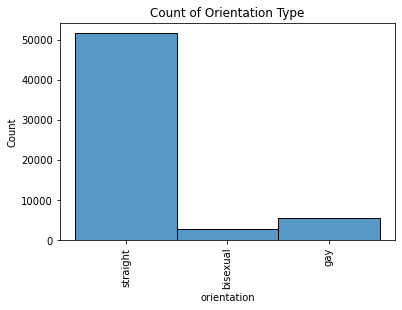

In [80]:
## histogram for orientation

sns.histplot(x = df["orientation"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Orientation Type")

Text(0.5, 1.0, 'Count of Pets Type')

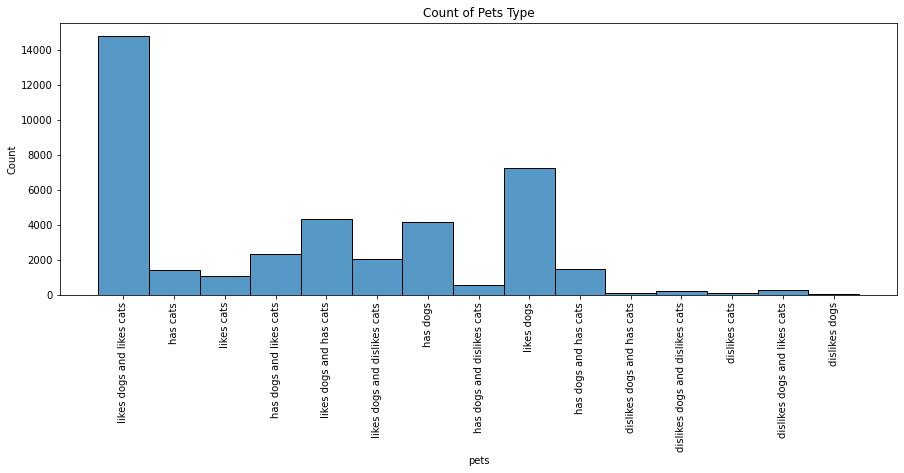

In [81]:
## histogram for pets

plt.figure(figsize = (15,5))
sns.histplot(x = df["pets"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Pets Type")

Text(0.5, 1.0, 'Count of Sex')

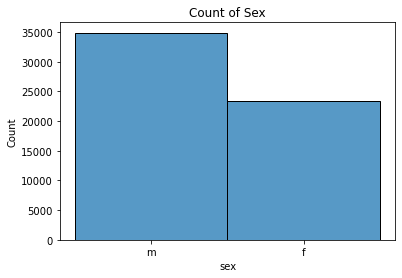

In [82]:
## histogram for sex

sns.histplot(x = df2["sex"], kde = False)
plt.title("Count of Sex")

Text(0.5, 1.0, 'Count of Drink Types')

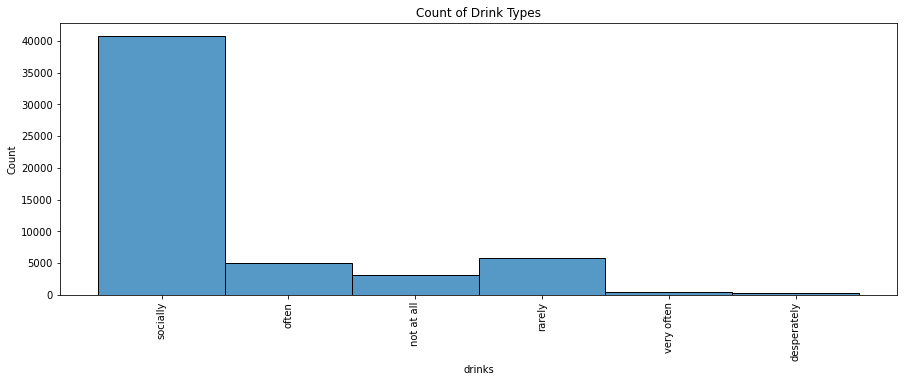

In [83]:
## histogram for drinking habits

plt.figure(figsize = (15,5))
sns.histplot(x = df2["drinks"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drink Types")

Text(0.5, 1.0, 'Count of Smokes')

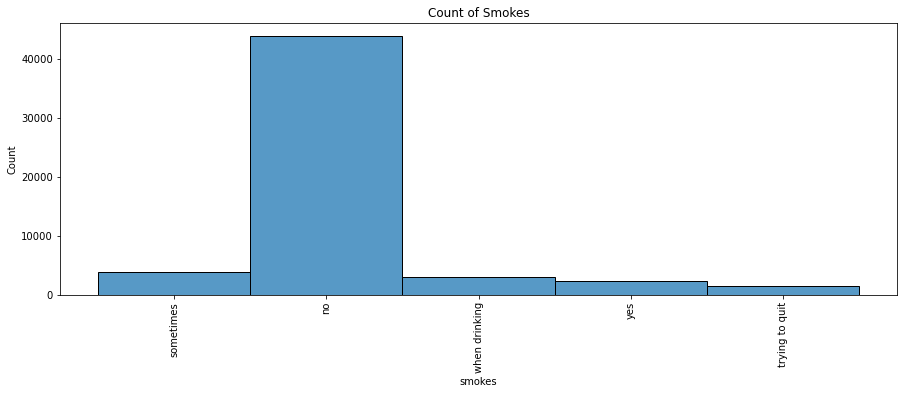

In [84]:
## histogram for smokes

plt.figure(figsize = (15,5))
sns.histplot(x = df["smokes"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Smokes")

Text(0.5, 1.0, 'Count of Status')

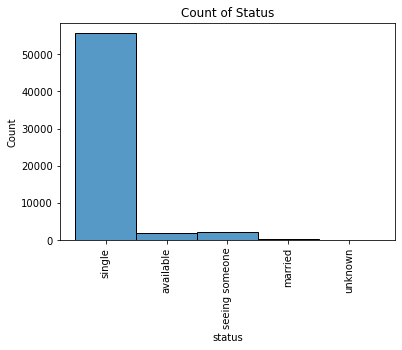

In [85]:
## histogram for status

sns.histplot(x = df["status"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Status")

Text(0.5, 1.0, 'Count of Drug Level')

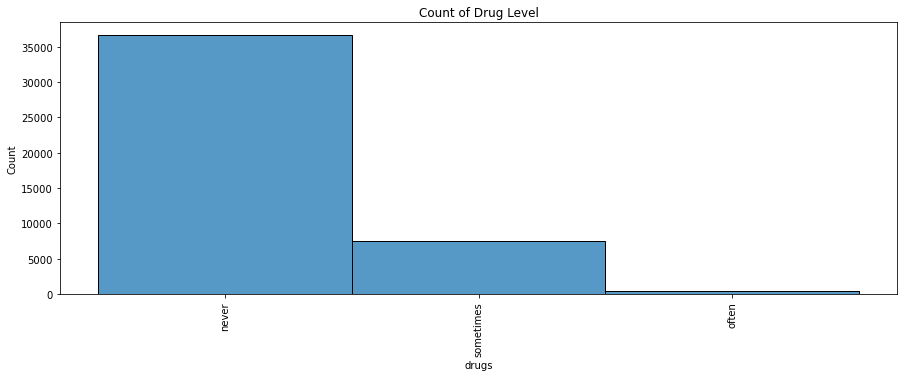

In [86]:
## histogram for drug habits

plt.figure(figsize = (15,5))
sns.histplot(x = df2["drugs"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drug Level")

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58304 entries, 0 to 59945
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         58304 non-null  int64  
 1   body_type                   53088 non-null  object 
 2   diet                        34514 non-null  object 
 3   drinks                      55388 non-null  object 
 4   drugs                       44464 non-null  object 
 5   education                   51826 non-null  object 
 6   ethnicity                   52762 non-null  object 
 7   height                      58301 non-null  float64
 8   income                      58304 non-null  int64  
 9   job                         50263 non-null  object 
 10  offspring                   23416 non-null  object 
 11  orientation                 58304 non-null  object 
 12  pets                        38838 non-null  object 
 13  religion                    384

## df3: includes non-response

In [275]:
df3 = df2.copy()

In [276]:
def drink_level(drink):
    if drink == "desperately":
        return 6
    if drink == "very often":
        return 5
    if drink == "often":
        return 4
    if drink == "socially":
        return 3
    if drink == "rarely":
        return 2
    if drink == "not at all":
        return 1
    else:
        return "Unknown"

df3["drink_level"] = df3["drinks"].apply(drink_level)

In [277]:
def drugs_level(drug):
    if drug == "often":
        return 3
    if drug == "sometimes":
        return 2
    if drug == "never":
        return 1
    else:
        return 0

df3["drugs_level"] = df3["drugs"].apply(drugs_level)

In [278]:
def edu_groups(type):
    if type == ("dropped out of high school" or "working on high school" or "high school"):
        return "HS or Less"
    if type == ("working on college/university" or "graduated from college/university" or "college/university" or "two-year college" or "graduated from two-year college" or "dropped out of college/university"):
        return "2-4-Year College"
    if type == ("graduated from masters program" or "working on masters program" or"graduated from ph.d program" or "graduated from law school" or "working on ph.d program" or "graduated from space camp" or "dropped out of space camp" or "graduated from med school" or "working on space camp" or "working on law school" or "working on med school" or "dropped out of masters program" or "masters program" or "dropped out of ph.d program" or "space camp" or "ph.d program" or "law school" or "dropped out of law school" or "dropped out of med school" or "med school"):
        return "More than College"
    else:
        return "Unknown"

df3["Edu_Type"] = df3["education"].apply(edu_groups)

In [279]:
def edu_level(type):
    if type == "HS or Less":
        return 1
    if type == "2-4-Year College":
        return 2
    if type == "More than College":
        return 3
    else:
        return 0

df3["Edu_Level"] = df3["Edu_Type"].apply(edu_level)

In [280]:
def kids_level(ans):
    if ans == "has kids, and wants more":
        return 15
    if ans == "has a kid, and wants more":
        return 14
    if ans == "wants kids":
        return 13
    if ans == "doesn&rsquo;t have kids, but wants them":
        return 12
    if ans == "has kids, and might want more":
        return 11
    if ans == "has a kid, and might want more":
        return 10
    if ans == "has kids":
        return 9
    if ans == "has a kid":
        return 8
    if ans == "might want kids":
        return 7
    if ans == "doesn&rsquo;t have kids, but might want them":
        return 6
    if ans == "has kids, but doesn&rsquo;t want more":
        return 5
    if ans == "has a kid, but doesn&rsquo;t want more":
        return 4
    if ans == "doesn&rsquo;t have kids":
        return 3
    if ans == "doesn&rsquo;t want kids":
        return 2
    if ans == "doesn&rsquo;t have kids, and doesn&rsquo;t want any":
        return 1
    else:
        return 0

df3["kids_level"] = df3["offspring"].apply(kids_level)

In [281]:
def dog_level(ans):
    if ans == "dislikes dogs and dislikes cats":
        return 1
    if ans == "dislikes dogs":
        return 2
    if ans == "dislikes dogs and has cats":
        return 3
    if ans == "dislikes dogs and likes cats":
        return 4
    if ans == "likes dogs and has cats":
        return 5
    if ans == "likes dogs":
        return 6
    if ans == "likes dogs and likes cats":
        return 7
    if ans == "has dogs and likes cats":
        return 8
    if ans == "has dogs and has cats":
        return 9
    if ans == "has dogs":
        return 10
    if ans =="likes dogs and dislikes cats":
        return 11
    if ans == "has dogs and dislikes cats":
        return 12
    else:
        return 0

df3["dog_level"] = df3["pets"].apply(dog_level)

In [282]:
def cat_level(ans):
    if ans == "dislikes dogs and dislikes cats":
        return 1
    if ans == "dislikes cats":
        return 2
    if ans == "has dogs and dislikes cats":
        return 3
    if ans == "likes dogs and dislikes cats":
        return 4
    if ans == "has dogs and likes cats":
        return 5
    if ans == "likes cats":
        return 6
    if ans == "likes dogs and likes cats":
        return 7
    if ans == "likes dogs and has cats":
        return 8
    if ans == "has dogs and has cats":
        return 9
    if ans == "has cats":
        return 10
    if ans =="dislikes dogs and likes cats":
        return 11
    if ans == "dislikes dogs and has cats":
        return 12
    else:
        return 0

df3["cat_level"] = df3["pets"].apply(cat_level)

In [283]:
def smoke_level(ans):
    if ans == "no":
        return 1
    if ans == "when drinking":
        return 2
    if ans == "sometimes":
        return 3
    if ans == "trying to quit":
        return 4
    if ans == "yes":
        return 5
    else:
        return 0

df3["smoke_level"] = df3["smokes"].apply(smoke_level)

In [284]:
def status_level(ans):
    if ans == "unknown":
        return 1
    if ans == "married":
        return 2
    if ans == "seeing someone":
        return 3
    if ans == "available":
        return 4
    if ans == "single":
        return 5
    else:
        return 0

df3["status_level"] = df3["status"].apply(status_level)

In [285]:
def diet_groups(type):
    if type == ("vegetarian" or "mostly vegetarian" or "strictly vegan" or "strictly vegetarian" or "mostly vegan" or "vegan"):
        return "Veg/Vegan"
    if type == ("strictly anything" or "anything" or "mostly anything"):
        return "Omnivore"
    if type == ("mostly halal" or "mostly kosher" or "halal" or "strictly halal" or "kosher" or "strictly kosher"):
        return "Religion-based"
    if type == ("mostly other" or "strictly other" or "other"):
        return "Other"
    else:
        return "Unknown"

df3["Diet_Type"] = df3["diet"].apply(diet_groups)

In [286]:
def rel_level_2(ans):
    if ans == "hinduism and laughing about it":
        return 1
    if ans == "islam and laughing about it":
        return 1
    if ans == "buddhism and laughing about it":
        return 1
    if ans == "judaism and laughing about it":
        return 1
    if ans == "christianity and laughing about it":
        return 1
    if ans == "catholicism and laughing about it":
        return 1
    if ans == "hinduism but not too serious about it":
        return 2
    if ans == "islam but not too serious about it":
        return 2
    if ans == "buddhism but not too serious about it":
        return 2
    if ans == "judaism but not too serious about it":
        return 2
    if ans == "christianity but not too serious about it":
        return 2
    if ans == "catholicism but not too serious about it":
        return 2
    if ans == "hinduism":
        return 3
    if ans == "islam":
        return 3
    if ans == "buddhism":
        return 3
    if ans == "judaism":
        return 3
    if ans == "christianity":
        return 3
    if ans == "catholicism":
        return 3
    if ans == "hinduism and somewhat serious about it":
        return 4
    if ans == "islam and somewhat serious about it":
        return 4
    if ans == "buddhism and somewhat serious about it":
        return 4
    if ans == "judaism and somewhat serious about it":
        return 4
    if ans == "christianity and somewhat serious about it":
        return 4
    if ans == "catholicism and somewhat serious about it":
        return 4
    if ans == "hinduism and very serious about it":
        return 5 
    if ans == "islam and very serious about it":
        return 5 
    if ans == "buddhism and very serious about it":
        return 5 
    if ans == "judaism and very serious about it":
        return 5 
    if ans == "christianity and very serious about it":
        return 5 
    if ans == "catholicism and very serious about it":
        return 5 
    else:
        return 0
    
df3["religious_level_no_ath_agn"] = df3["religion"].apply(rel_level_2)

In [287]:
def rel_level(ans):
    if ans == "agnosticism and laughing about it":
        return 1
    if ans == "agnosticism but not too serious about it":
        return 1
    if ans == "agnosticism":
        return 1
    if ans == "agnosticism and somewhat serious about it":
        return 1
    if ans == "agnosticism and very serious about it":
        return 1
    if ans == "atheism and laughing about it":
        return 1
    if ans == "atheism but not too serious about it":
        return 1
    if ans == "atheism":
        return 1
    if ans == "atheism and somewhat serious about it":
        return 1
    if ans == "atheism and very serious about it":
        return 1
    if ans == "hinduism and laughing about it":
        return 1
    if ans == "islam and laughing about it":
        return 1
    if ans == "buddhism and laughing about it":
        return 1
    if ans == "judaism and laughing about it":
        return 1
    if ans == "christianity and laughing about it":
        return 1
    if ans == "catholicism and laughing about it":
        return 1
    if ans == "hinduism but not too serious about it":
        return 2
    if ans == "islam but not too serious about it":
        return 2
    if ans == "buddhism but not too serious about it":
        return 2
    if ans == "judaism but not too serious about it":
        return 2
    if ans == "christianity but not too serious about it":
        return 2
    if ans == "catholicism but not too serious about it":
        return 2
    if ans == "hinduism":
        return 3
    if ans == "islam":
        return 3
    if ans == "buddhism":
        return 3
    if ans == "judaism":
        return 3
    if ans == "christianity":
        return 3
    if ans == "catholicism":
        return 3
    if ans == "hinduism and somewhat serious about it":
        return 4
    if ans == "islam and somewhat serious about it":
        return 4
    if ans == "buddhism and somewhat serious about it":
        return 4
    if ans == "judaism and somewhat serious about it":
        return 4
    if ans == "christianity and somewhat serious about it":
        return 4
    if ans == "catholicism and somewhat serious about it":
        return 4
    if ans == "hinduism and very serious about it":
        return 5 
    if ans == "islam and very serious about it":
        return 5 
    if ans == "buddhism and very serious about it":
        return 5 
    if ans == "judaism and very serious about it":
        return 5 
    if ans == "christianity and very serious about it":
        return 5 
    if ans == "catholicism and very serious about it":
        return 5
    else:
        return 0
    
df3["religious_level"] = df3["religion"].apply(rel_level_2)

In [288]:
def rel_group(ans):
    if ans == "judaism and laughing about it":
        return "Jewish"
    if ans == "judaism but not too serious about it":
        return "Jewish"
    if ans == "judaism":
        return "Jewish"
    if ans == "judaism and somewhat serious about it":
        return "Jewish"
    if ans == "judaism and very serious about it":
        return "Jewish" 
    if ans == "catholicism and laughing about it":
        return "Catholic"
    if ans == "catholicism but not too serious about it":
        return "Catholic"
    if ans == "catholicism":
        return "Catholic"
    if ans == "catholicism and somewhat serious about it":
        return "Catholic"
    if ans == "catholicism and very serious about it":
        return "Catholic" 
    if ans == "christianity and laughing about it":
        return "Christian"
    if ans == "christianity but not too serious about it":
        return "Christian"
    if ans == "christianity":
        return "Christian"
    if ans == "christianity and somewhat serious about it":
        return "Christian"
    if ans == "christianity and very serious about it":
        return "Christian"
    if ans == "hinduism and laughing about it":
        return "Hindu"
    if ans == "hinduism but not too serious about it":
        return "Hindu"
    if ans == "hinduism":
        return "Hindu"
    if ans == "hinduism and somewhat serious about it":
        return "Hindu"
    if ans == "hinduism and very serious about it":
        return "Hindu" 
    if ans == "buddhism and laughing about it":
        return "Buddhist"
    if ans == "buddhism but not too serious about it":
        return "Buddhist"
    if ans == "buddhism":
        return "Buddhist"
    if ans == "buddhism and somewhat serious about it":
        return "Buddhist"
    if ans == "buddhism and very serious about it":
        return "Buddhist" 
    if ans == "agnosticism and laughing about it":
        return "Agnostic"
    if ans == "agnosticism but not too serious about it":
        return "Agnostic"
    if ans == "agnosticism":
        return "Agnostic"
    if ans == "agnosticism and somewhat serious about it":
        return "Agnostic"
    if ans == "agnosticism and very serious about it":
        return "Agnostic"
    if ans == "atheism and laughing about it":
        return "Atheist"
    if ans == "atheism but not too serious about it":
        return "Atheist"
    if ans == "atheism":
        return "Atheist"
    if ans == "atheism and somewhat serious about it":
        return "Atheist"
    if ans == "atheism and very serious about it":
        return "Atheist"
    else:
        return "Unknown"

df3["religion_group"] = df3["religion"].apply(rel_group)

In [289]:
def inc_group(ans):
    if ans == (20000 or 30000 or 40000):
        return "$20K-$49K"
    if ans == (50000 or 60000 or 70000):
        return "$50K-$79K"
    if ans == (80000 or 100000):
        return "$80K-$149K"
    if ans == (150000 or 250000):
        return "$150K+"
    else:
        return "Unknown"
    
df3["income_group"] = df3["income"].apply(inc_group)

In [290]:
def inc_level(ans):
    if ans == "Unknown":
        return 0
    if ans == "$20K-$49K":
        return 1
    if ans == "$50K-$79K":
        return 2
    if ans == "$80K-$149K":
        return 3
    if ans == "$150K+":
        return 4
    else:
        return 0

df3["income_level"] = df3["income_group"].apply(inc_level)

In [291]:
def hgt_group(ans):
    if ans < 48:
        return "less than 4'"
    if (ans >= 48 and ans < 60):
        return "4' - 4'11"
    if (ans >= 60 and ans <66):
        return "5' - 5'5"
    if (ans >= 66 and ans <72):
        return "5'6 - 5'11"
    if (ans >= 72 and ans <78):
        return "6' - 6'5"
    if (ans >78):
        return "6'6+"
    else:
        return "Unknown"

df3["height_group"] = df3["height"].apply(hgt_group)

In [292]:
def hgt_level(ans):
    if ans < 48:
        return 1
    if (ans >= 48 and ans < 60):
        return 2
    if (ans >= 60 and ans <66):
        return 3
    if (ans >= 66 and ans <72):
        return 4
    if (ans >= 72 and ans <78):
        return 5
    if (ans >78):
        return 6
    else:
        return 0

df3["height_level"] = df3["height"].apply(hgt_level)

## Correlations Between Numeric Variables

In [293]:
pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

### Correlations from Responses Only

In [294]:
df2.corr()

,age,height,income,drink_level,drugs_level,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,income_level,height_level,pet_level
age,1.000000,-0.011359,0.105166,-0.113383,-0.139863,5.536387e-01,0.090554,-0.026459,0.092921,-0.137138,0.015193,0.002199,0.002199,0.029841,0.013753,0.008958,-1.351631e-01,0.068068,0.044662,-0.001333,-0.002876,0.455406,-0.008399,0.070556
height,-0.011359,1.000000,0.111291,0.031882,0.070191,-1.790640e-02,-0.056963,-0.024843,-0.009042,0.039928,0.006436,-0.064833,-0.064833,-0.037128,-0.037333,-0.008240,9.051430e-02,-0.102315,-0.053255,-0.103694,-0.089814,0.126361,0.905121,-0.078671
income,0.105166,0.111291,1.000000,0.001929,0.008607,1.022887e-01,0.047893,0.002110,0.010961,-0.004151,-0.010370,-0.013308,-0.013308,0.000046,-0.005079,0.013675,-1.747118e-01,-0.007650,-0.033881,-0.024283,-0.024276,0.976425,0.104197,-0.016810
drink_level,-0.113383,0.031882,0.001929,1.000000,0.212569,7.624793e-03,-0.052553,-0.002445,-0.022653,0.128587,0.003699,-0.130873,-0.130873,-0.014226,-0.017711,-0.158279,-1.019965e-01,-0.111860,-0.056943,-0.154842,-0.092942,0.039253,0.029867,-0.020674
drugs_level,-0.139863,0.070191,0.008607,0.212569,1.000000,-2.283865e-01,-0.151556,-0.041253,0.049672,0.337310,-0.088802,-0.126318,-0.126318,-0.014659,-0.003087,0.064081,3.561141e-02,-0.137379,-0.133550,-0.094611,-0.117302,-0.218087,0.065025,-0.024765
Edu_Level,0.553639,-0.017906,0.102289,0.007625,-0.228386,1.000000e+00,0.119107,-0.079665,-0.003044,-0.314009,0.062844,-0.052368,-0.052368,0.086009,-0.011790,-0.043402,5.810592e-17,0.073258,0.072535,-0.062557,-0.041381,0.731713,-0.018926,-0.055515
kids_level,0.090554,-0.056963,0.047893,-0.052553,-0.151556,1.191071e-01,1.000000,0.069856,-0.038039,-0.062582,0.056497,0.116987,0.116987,0.004022,-0.042022,-0.144119,1.193570e-01,0.037267,0.139594,0.127010,0.126937,0.122406,-0.052995,0.040741
dog_level,-0.026459,-0.024843,0.002110,-0.002445,-0.041253,-7.966472e-02,0.069856,1.000000,-0.577113,0.017541,0.039504,0.035057,0.035057,0.007287,-0.046655,-0.039082,-1.097764e-01,0.007253,0.018678,0.020934,0.069038,-0.012161,-0.025352,-0.029414
cat_level,0.092921,-0.009042,0.010961,-0.022653,0.049672,-3.043976e-03,-0.038039,-0.577113,1.000000,0.033960,-0.062733,-0.024897,-0.024897,-0.013111,0.052146,0.032697,-1.183302e-01,0.041935,-0.004238,-0.031913,-0.034860,-0.001068,-0.007098,0.389370
smoke_level,-0.137138,0.039928,-0.004151,0.128587,0.337310,-3.140086e-01,-0.062582,0.017541,0.033960,1.000000,-0.005986,-0.026237,-0.026237,0.001446,0.032614,-0.037229,8.216369e-02,-0.000031,-0.083633,-0.048506,-0.032088,-0.248895,0.038600,0.019126


### Strongest Correlations:
- dog level and cat level (-0.577)
- smoke level and drug level (0.337)
- drinks level and drugs level (0.213)
- kids level and drugs level (-0.152)
- drink level and smoke level (0.129)
- height and income (0.111)
- income and education level (0.102)


#### Related to Age
- education level and age (0.553)
- income level and age (0.455)
- age and drugs level (-0.140)
- smoke level and age (-0.137)
- drink level and age (-0.113)
- income and age (0.105)

#### Related to Religion
- religious level and kids level (0.250)
- religious level and drugs level (-0.198)
- islam level and income (-0.174)
- hinduism level and kids level (-0.144)
- judaism level and kids level (0.140)
- buddhism level and drugs level (-0.137)
- judaism level and drugs level (-0.134)
- religious level and height (-0.134)
- religious level and drink level (-0.132)
- christianity level and kids level (0.127)
- catholicism level and kids level (0.127)
- religious level (no ath or agn) and drugs level (-0.126)
- islam level and cat level (-0.118)
- religious level (no ath or agn) and kids level (0.117)
- islam level and dog level (-0.110)
- christianity level and height (-0.104)

### Correlations Including Non-Response

In [295]:
df3.corr()

,age,height,income,drugs_level,Edu_Level,kids_level,dog_level,cat_level,smoke_level,status_level,religious_level_no_ath_agn,religious_level,agnosticism_level,atheism_level,hinduism_level,islam_level,buddhism_level,judaism_level,christianity_level,catholicism_level,income_level,height_level,pet_level
age,1.000000,-0.011359,0.105166,-0.047990,0.032805,0.145765,0.006669,0.046422,-0.095704,0.015193,0.043081,0.043081,0.029841,0.013753,0.008958,-0.135163,0.068068,0.044662,-0.001333,-0.002876,0.039300,-0.007126,0.070556
height,-0.011359,1.000000,0.111291,0.009975,-0.038596,-0.048813,-0.041197,-0.031219,0.028693,0.006436,-0.091036,-0.091036,-0.037128,-0.037333,-0.008240,0.090514,-0.102315,-0.053255,-0.103694,-0.089814,0.062852,0.841931,-0.078671
income,0.105166,0.111291,1.000000,0.055008,0.021239,0.073489,0.039310,0.042875,0.018563,-0.010370,0.025718,0.025718,0.000046,-0.005079,0.013675,-0.174712,-0.007650,-0.033881,-0.024283,-0.024276,0.598905,0.099191,-0.016810
drugs_level,-0.047990,0.009975,0.055008,1.000000,0.006965,0.017175,0.028697,0.057736,0.200907,-0.039761,0.033349,0.033349,-0.012290,0.028282,0.149089,0.051168,-0.015042,-0.015185,0.038068,0.032133,0.059943,0.011147,-0.018154
Edu_Level,0.032805,-0.038596,0.021239,0.006965,1.000000,0.016446,0.016180,0.011728,-0.035553,0.014725,0.030793,0.030793,0.016027,0.009434,-0.100821,0.076780,0.025699,0.074540,-0.019940,-0.023612,0.015844,-0.039296,-0.006631
kids_level,0.145765,-0.048813,0.073489,0.017175,0.016446,1.000000,0.123086,0.069425,0.010688,0.046207,0.124229,0.124229,0.003411,-0.016413,0.032462,0.118435,0.003438,0.057575,0.090006,0.079613,0.049850,-0.042990,0.021720
dog_level,0.006669,-0.041197,0.039310,0.028697,0.016180,0.123086,1.000000,0.409376,0.068494,-0.020356,0.051762,0.051762,-0.052929,-0.044526,-0.027555,-0.138754,0.004403,-0.069088,-0.056549,-0.080864,0.043731,-0.034906,-0.016113
cat_level,0.046422,-0.031219,0.042875,0.057736,0.011728,0.069425,0.409376,1.000000,0.099468,-0.094528,-0.044291,-0.044291,-0.070085,0.021566,-0.018912,-0.139275,-0.007393,-0.068816,-0.056099,-0.152475,0.052293,-0.028569,-0.220943
smoke_level,-0.095704,0.028693,0.018563,0.200907,-0.035553,0.010688,0.068494,0.099468,1.000000,-0.015510,-0.007266,-0.007266,-0.008868,0.041658,-0.040975,0.101734,0.008995,-0.079151,-0.041183,-0.037008,0.038100,0.027704,0.010909
status_level,0.015193,0.006436,-0.010370,-0.039761,0.014725,0.046207,-0.020356,-0.094528,-0.015510,1.000000,0.044002,0.044002,0.019644,-0.058843,-0.019227,0.030208,0.065079,0.048227,0.005446,0.049566,-0.014855,0.006801,-0.019908


### Related to Age
- age and kids level (0.146)
- age and islam level (-0.135)
- age and income (0.105)


### Related to Religion
- religious level and kids level (0.124)
- islam level and kids level (0.118)
- catholicism level and cat level (-0.152)
- islam level and dog level (-0.139)
- islam level and cat level (-0.139)
- buddhism level and height level (-0.110)
- islam level and smoke level (0.101)

### Related to Pets
- dog level and cat level (0.409)
- age and kids level (0.146)
- catholicism level and cat level (-0.154)
- islam level and dog level (-0.139)
- islam level and cat level (-0.139)
- dog level and kid level (0.123)

# Visuals

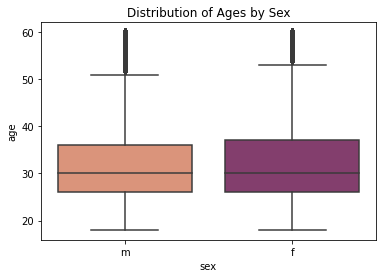

In [296]:
# boxplot of age per sex
pal = sns.color_palette("flare")

sns.boxplot(x = df2["sex"], y = df2["age"], palette=np.array(pal[::4]))

plt.title('Distribution of Ages by Sex')
plt.savefig("OKCupidAgeSex.png")
plt.show()

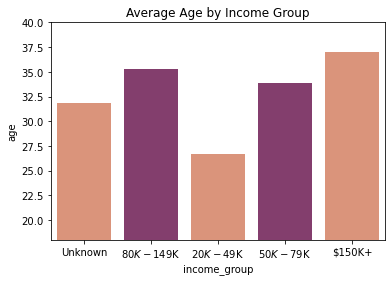

In [329]:
# boxplot of age per sex
pal = sns.color_palette("flare")

sns.barplot(x = df2["income_group"], y = df2["age"], ci = None, palette=np.array(pal[::4]))
plt.ylim([18, 40])
plt.title('Average Age by Income Group')
plt.savefig("OKCupidAgeInc.png")
plt.show()

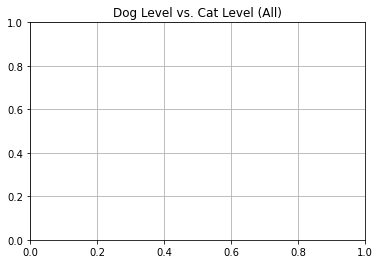

In [298]:
# scatter plot of dog level and cat level for all responses, including no response
plt.title('Dog Level vs. Cat Level (All)')
plt.savefig("OKCupidDogCatAll.png")
plt.grid()
plt.show()

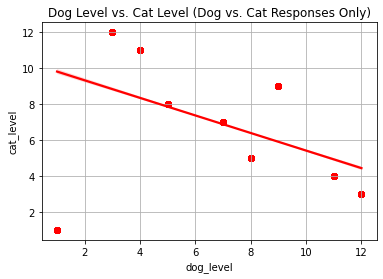

In [299]:
# scatter plot of dog level and cat level for only responses including one or the other
sns.regplot(x = df2["dog_level"], y = df2["cat_level"], fit_reg = True, color = "r")
plt.title('Dog Level vs. Cat Level (Dog vs. Cat Responses Only)')
plt.savefig("OKCupidDogCat.png")
plt.grid()
plt.show()

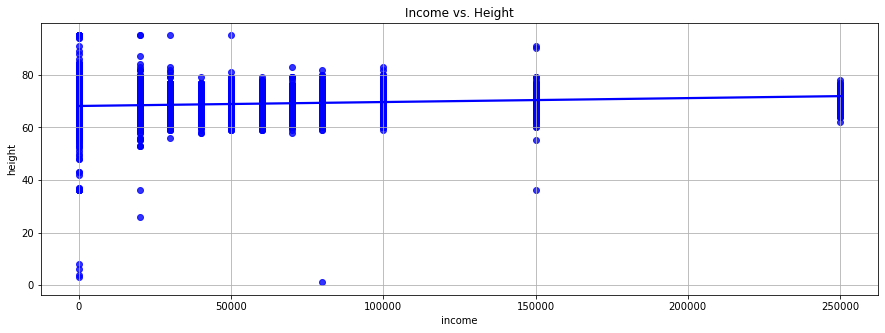

In [300]:
# scatter plot of height vs income
plt.figure(figsize = (15,5))
sns.regplot(x = df2["income"], y = df2["height"], fit_reg = True, color = "b")
plt.title('Income vs. Height')
plt.savefig("OKCupidIncHgt.png")
plt.grid()
plt.show()

## Religion Visuals

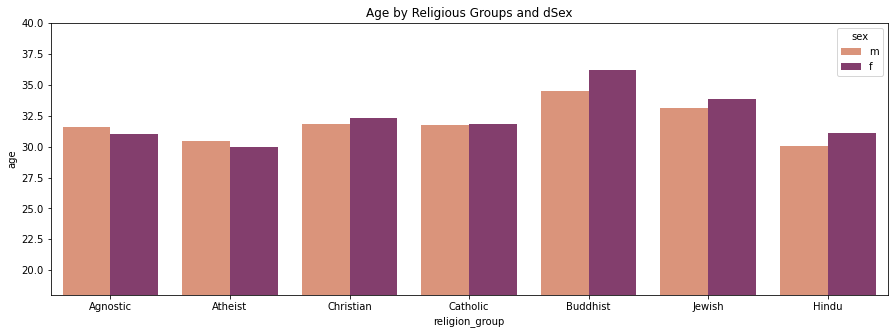

In [328]:
# boxplot of religious group vs age
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(x = df2["religion_group"], y = df2["age"], hue = df2["sex"], ci = None, palette=np.array(pal[::4]))
plt.title('Age by Religious Groups and dSex')

plt.ylim([18, 40])
plt.savefig("OKCupidRelAgeSex.png")
plt.show()

In [302]:
df4_inc = df3.copy()

### df4_inc: dataset with only people who answered income

In [303]:
#creating dataset with only people who answered income

df4_inc["inc"] = np.where(df4_inc["income"]>=0, "Y", "N")

df4_inc.drop(df4_inc.loc[df4_inc["inc"]=="N"].index, inplace = True)
df4_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10728 entries, 1 to 59943
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         10728 non-null  int64  
 1   body_type                   10199 non-null  object 
 2   diet                        6914 non-null   object 
 3   drinks                      10529 non-null  object 
 4   drugs                       9062 non-null   object 
 5   education                   10049 non-null  object 
 6   ethnicity                   10086 non-null  object 
 7   height                      10728 non-null  float64
 8   income                      10728 non-null  int64  
 9   job                         10433 non-null  object 
 10  offspring                   5216 non-null   object 
 11  orientation                 10728 non-null  object 
 12  pets                        8120 non-null   object 
 13  religion                    839

## Income Visuals

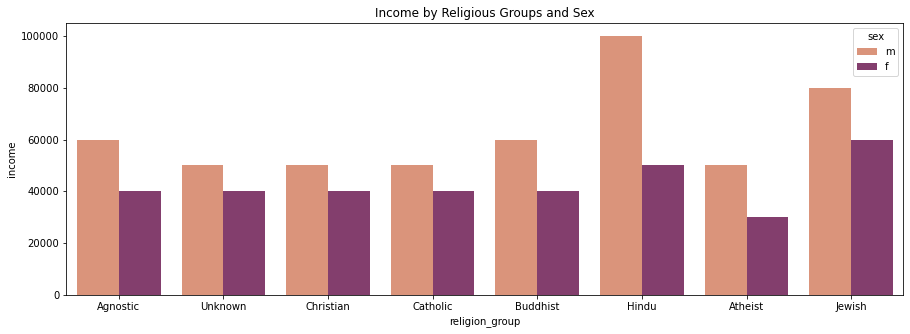

In [327]:
# boxplot of religious group vs income
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(data = df4_inc, x ="religion_group", y = "income", hue = "sex", ci = None, palette=np.array(pal[::4]), estimator = np.median)
plt.title('Income by Religious Groups and Sex')
plt.savefig("OKCupidRelAgeSex.png")
plt.show()

# hindu men make most money

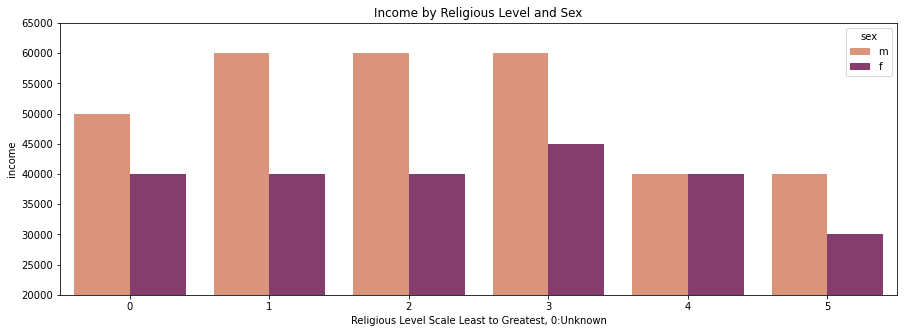

In [326]:
# boxplot of religious group vs income
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(data = df4_inc, x ="religious_level", y = "income", hue = "sex", ci = None, palette=np.array(pal[::4]), estimator = np.median)
plt.title('Income by Religious Level and Sex')
plt.ylim([20000, 65000])
plt.xlabel("Religious Level Scale Least to Greatest, 0:Unknown")
plt.savefig("OKCupidRelLevIncSex.png")
plt.show()

# most religious make least money

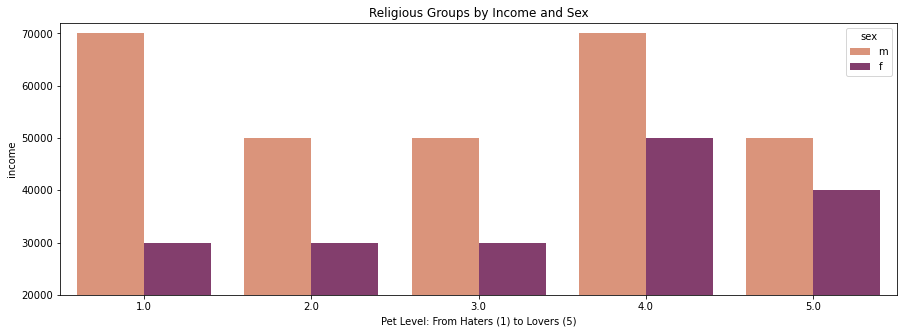

In [316]:
# boxplot of pet level vs income
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(data = df4_inc, x ="pet_level", y = "income", hue = "sex", ci = None, palette=np.array(pal[::4]), estimator = np.median)
plt.title('Religious Groups by Income and Sex')
plt.xlabel("Pet Level: From Haters (1) to Lovers (5)")
plt.ylim([20000, 72000])
plt.savefig("OKCupidPetAgeSex.png")
plt.show()

# men who hate or men who love pets make the most $$

In [ ]:
# boxplot of dog level vs income
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(data = df4_inc, x ="pet_level", y = "income", hue = "sex", ci = None, palette=np.array(pal[::4]), estimator = np.median)
plt.title('Religious Groups by Income and Sex')
plt.xlabel("Pet Level: From Haters (1) to Lovers (5)")
plt.ylim([20000, 72000])
plt.savefig("OKCupidPetAgeSex.png")
plt.show()

# men who hate or men who love pets make the most $$

## Height Visuals

In [307]:
#creating dataset with only people who answered height
df4_hgt = df3.copy()
df4_hgt["hgt"] = np.where(df4_hgt["height"]>=0, "Y", "N")
df4_hgt.drop(df4_hgt.loc[df4_hgt["hgt"]=="N"].index, inplace = True)

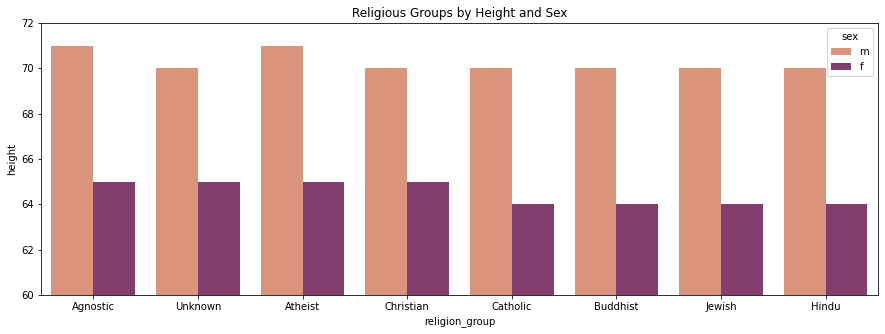

In [308]:
# boxplot of religious group vs height
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(data = df4_hgt, x ="religion_group", y = "height", hue = "sex", ci = None, palette=np.array(pal[::4]), estimator = np.median)
plt.title('Religious Groups by Height and Sex')
plt.ylim([60, 72])
plt.savefig("OKCupidRelHgtSex.png")
plt.show()

# no differences in height across religious groups

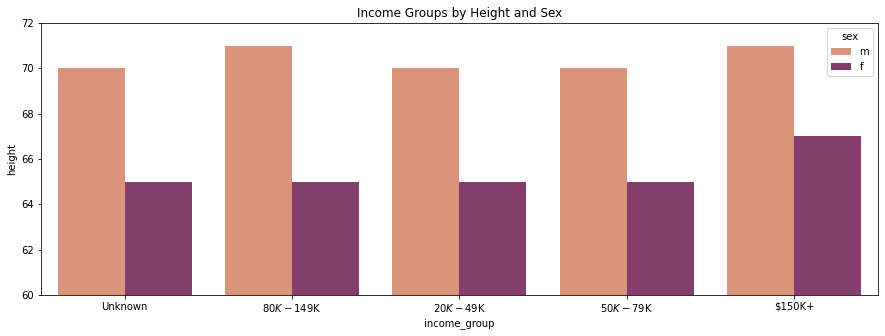

In [309]:
# boxplot of religious group vs height
pal = sns.color_palette("flare")
plt.figure(figsize = (15,5))
sns.barplot(data = df4_hgt, x ="income_group", y = "height", hue = "sex", ci = None, palette=np.array(pal[::4]), estimator = np.median)
plt.title('Income Groups by Height and Sex')
plt.ylim([60, 72])
plt.savefig("OKCupidIncGrpHgtSex.png")
plt.show()

# only very high earners stand out

In [310]:
#creating dataset with only people who answered height
df4_hgt = df3.copy()
df4_hgt["hgt"] = np.where(df4_hgt["height"]>=0, "Y", "N")
df4_hgt.drop(df4_hgt.loc[df4_hgt["hgt"]=="N"].index, inplace = True)

In [311]:
sns.barplot?

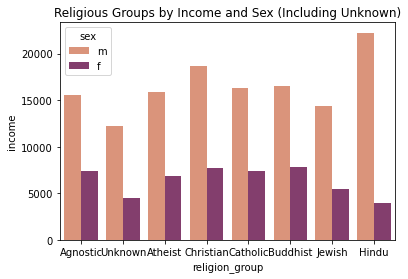

In [312]:
# boxplot of religious group vs age
pal = sns.color_palette("flare")

sns.barplot(x = df3["religion_group"], y = df3["income"], hue = df3["sex"], ci = None, palette=np.array(pal[::4]))
plt.title('Religious Groups by Income and Sex (Including Unknown)')

plt.savefig("OKCupidRelAgeSexAll.png")
plt.show()

# hindu men make more money than men of other religious groups??

In [313]:
# boxplot of religious group vs age
pal = sns.color_palette("flare")

sns.barplot(x = df3["religion_group"], y = df3["drink_level"], hue = df2["sex"], ci = None, palette=np.array(pal[::4]))
plt.title('Religious Groups by Income and Sex (Including Unknown)')

plt.savefig("OKCupidRelAgeSex.png")
plt.show()

# hindu men make more money than men of other religious groups??

TypeError: Neither the `x` nor `y` variable appears to be numeric.